In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

Mounted at /content/drive


In [ ]:

file_path = "/content/drive/MyDrive/cytoautocluster_dataset/Levine_32dim.fcs.csv"
data = pd.read_csv(file_path)


In [ ]:
data

Event       Time  Cell_length      DNA1      DNA2    CD45RA  \
0            1    2693.00           22  4.391057  4.617262  0.162691   
1            2    3736.00           35  4.340481  4.816692  0.701349   
2            3    7015.00           32  3.838727  4.386369  0.603568   
3            4    7099.00           29  4.255806  4.830048  0.433747   
4            5    7700.00           25  3.976909  4.506433 -0.008809   
...        ...        ...          ...       ...       ...       ...   
265622  265623  707951.44           41  6.826629  7.133022  1.474081   
265623  265624  708145.44           45  6.787791  7.154026  0.116755   
265624  265625  708398.44           41  6.889866  7.141219  0.684921   
265625  265626  708585.44           39  6.865218  7.144353  0.288761   
265626  265627  709122.44           41  6.887820  7.127359  0.360753   

           CD133      CD19      CD22     CD11b  ...     CD117     CD49d  \
0      -0.029585 -0.006696  0.066388 -0.009184  ...  0.053050  0.853505   
1      -0.038280 -0.016654  0.074409  0.808031  ...  0.089660  0.197818   
2      -0.032216  0.073855 -0.042977 -0.001881  ...  0.046222  2.586670   
3      -0.027611 -0.017661 -0.044072  0.733698  ...  0.066470  1.338669   
4      -0.030297  0.080423  0.495791  1.107627  ... -0.006223  0.180924   
...          ...       ...       ...       ...  ...       ...       ...   
265622 -0.019174 -0.055620 -0.007261  0.063395  ... -0.011105  0.533736   
265623 -0.056213 -0.008864 -0.035158 -0.041845  ...  0.143869  1.269464   
265624 -0.006264 -0.026111 -0.030837 -0.034641  ...  0.087102 -0.055912   
265625 -0.011310 -0.048786  0.073983 -0.031787  ... -0.047971  0.101955   
265626  0.128604 -0.006934  0.109846  3.864711  ...  0.080195  0.037962   

          HLA-DR      CD64      CD41  Viability  file_number  event_number  \
0       1.664480 -0.005376 -0.001961   0.648429     3.627711           307   
1       0.491592  0.144814  0.868014   0.561384     3.627711           545   
2       1.308337 -0.010961 -0.010413   0.643337     3.627711          1726   
3       0.140523 -0.013449 -0.026039  -0.026523     3.627711          1766   
4       0.197332  0.076167 -0.040488   0.283287     3.627711          2031   
...          ...       ...       ...        ...          ...           ...   
265622  0.123758 -0.042495 -0.027971   0.236957     3.669327        102686   
265623  0.047215 -0.008000 -0.025811  -0.003500     3.669327        102690   
265624  0.501536  0.053884 -0.042602   0.107206     3.669327        102701   
265625  6.200001  0.296877  0.192786   0.620872     3.669327        102706   
265626  3.675123 -0.000878 -0.052526   0.310466     3.669327        102720   

        label  individual  
0         1.0           1  
1         1.0           1  
2         1.0           1  
3         1.0           1  
4         1.0           1  
...       ...         ...  
265622    NaN           2  
265623    NaN           2  
265624    NaN           2  
265625    NaN           2  
265626    NaN           2  

[265627 rows x 42 columns]

In [ ]:

import matplotlib.pyplot as plt
print("Data loaded successfully")


Data loaded successfully


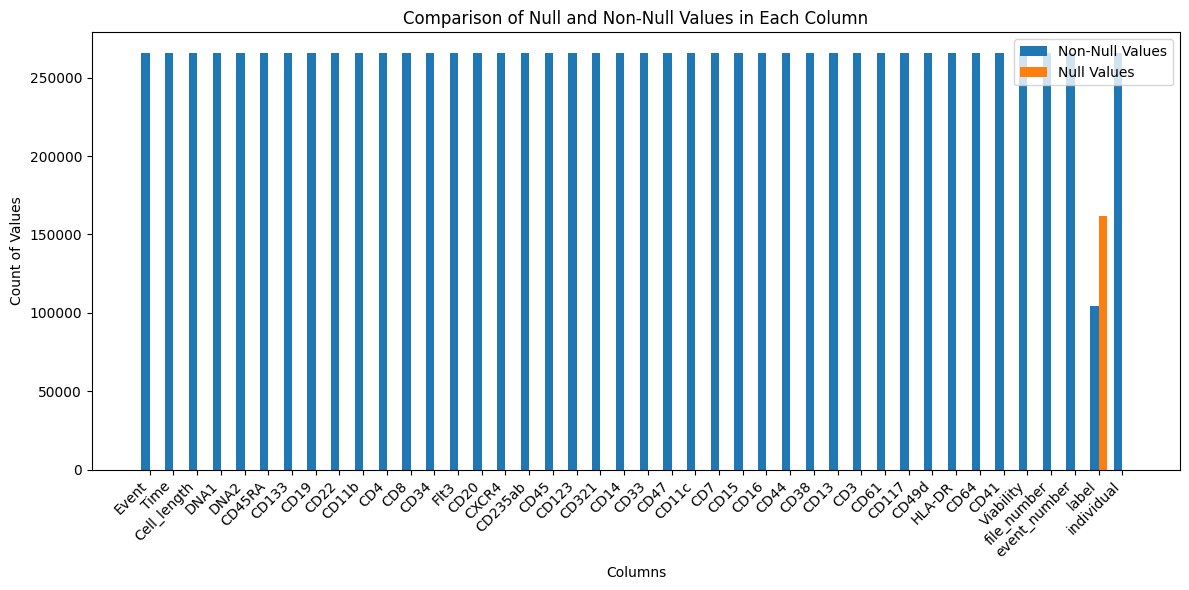

In [ ]:
import numpy as np
# Proceed if the data is available
if data is not None:
    # Step 1: Calculate the number of null and non-null values for each column
    null_counts = data.isnull().sum()  # Number of null values per column
    non_null_counts = data.notnull().sum()  # Number of non-null values per column

    # Step 2: Create a list of column names for the x-axis
    columns = data.columns

    # Step 3: Set the width for the bars and the positions for each set
    bar_width = 0.35
    index = np.arange(len(columns))  # The x locations for the groups

    # Step 4: Create the plot using plt.bar() twice for separate bars
    plt.figure(figsize=(12, 6))

    # Plot for Non-Null values (left bar for each column)
    plt.bar(index, non_null_counts, bar_width, label='Non-Null Values', color='#1f77b4')

    # Plot for Null values (right bar for each column)
    plt.bar(index + bar_width, null_counts, bar_width, label='Null Values', color='#ff7f0e')

    # Step 5: Add labels, title, and legend
    plt.xlabel('Columns')
    plt.ylabel('Count of Values')
    plt.title('Comparison of Null and Non-Null Values in Each Column')

    # Set the x-ticks to be in the middle of the bars
    plt.xticks(index + bar_width / 2, columns, rotation=45, ha='right')

    # Add the legend
    plt.legend()

    # Show the plot
    plt.tight_layout()  # Adjust layout to fit everything
    plt.show()
else:
    print("No data available for visualization.")


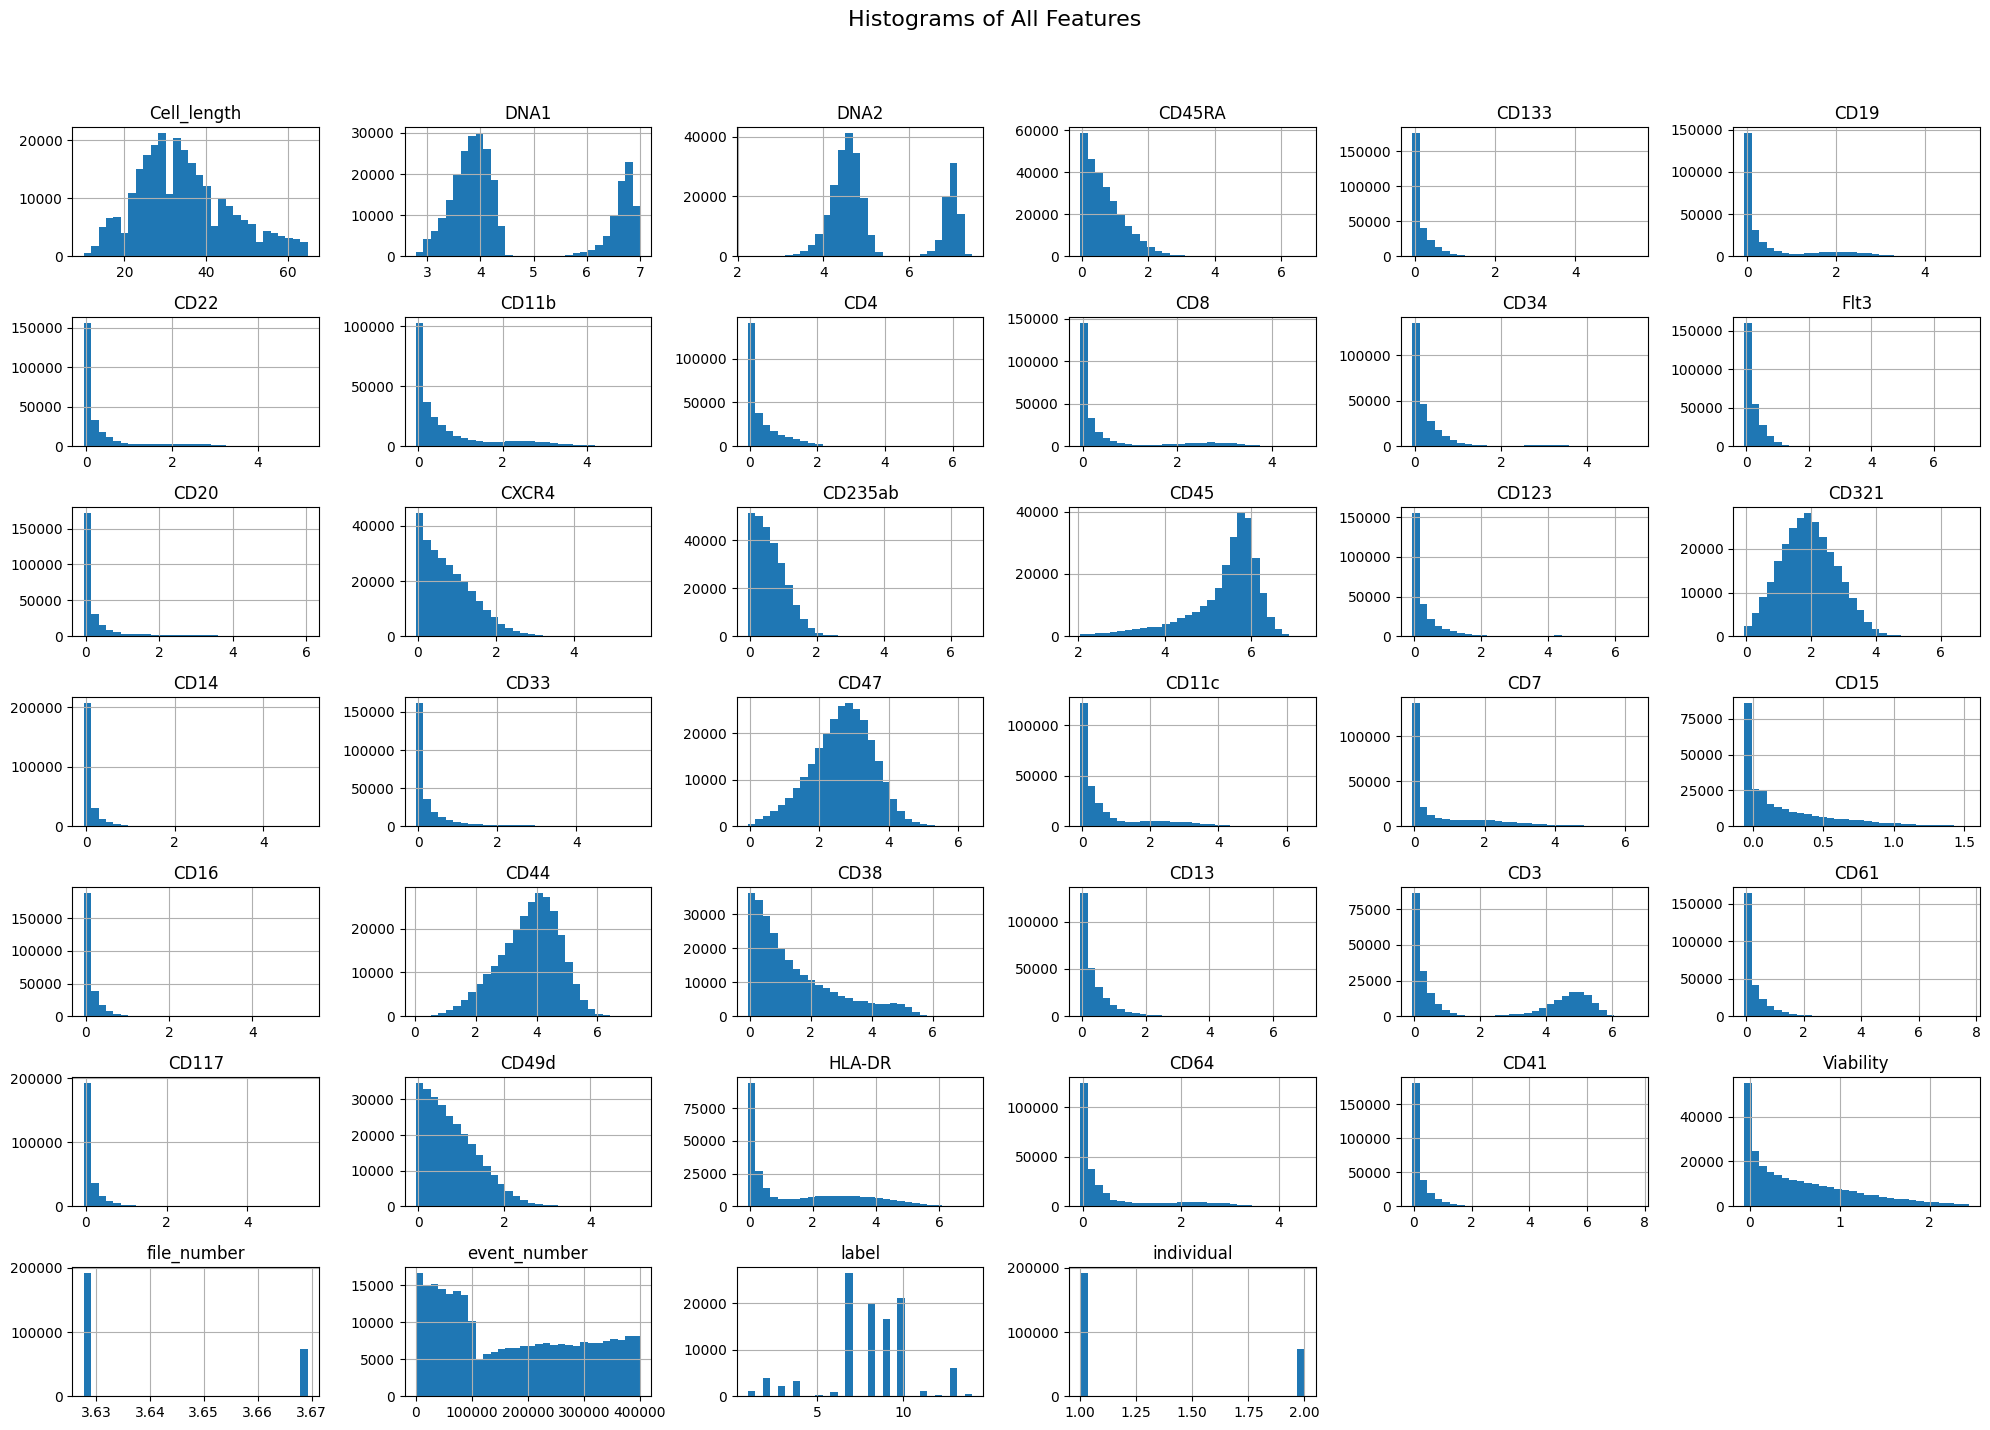

In [ ]:



## Drop the 'Event' and 'Time' columns before plotting
data.drop(['Event', 'Time'], axis=1).hist(bins=30, figsize=(20, 15))

# Adjust the title and layout
plt.suptitle('Histograms of All Features', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make space for the title
plt.show()

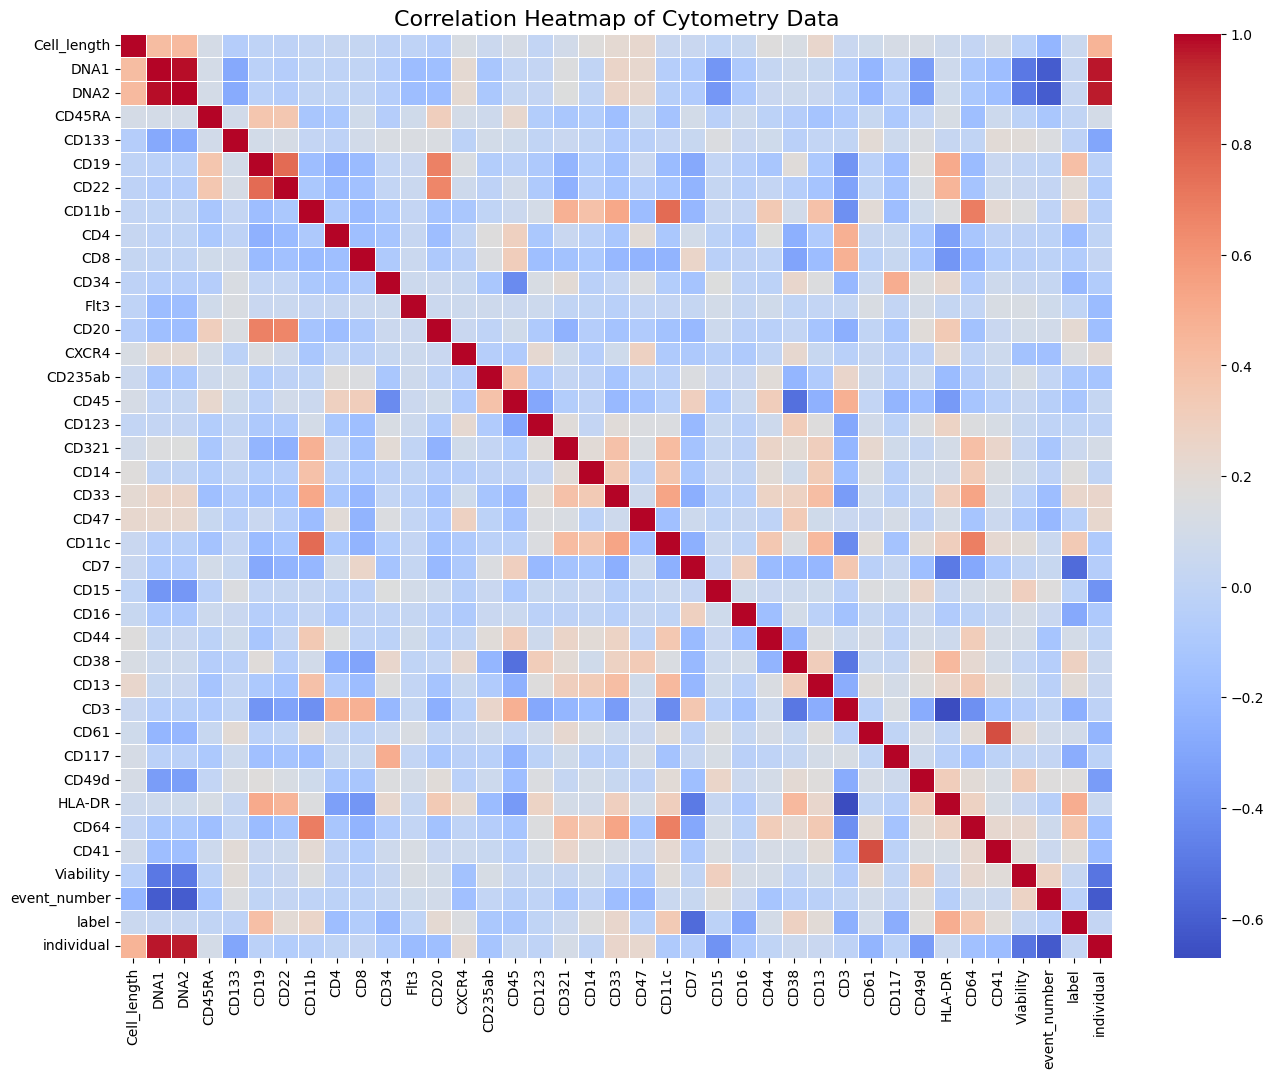

In [ ]:
import seaborn as sns

# Drop 'Event', 'Time', and 'File No' columns before computing the correlation matrix
# Using errors='ignore' will prevent errors if the columns don't exist
correlation_matrix = data.drop(['Event', 'Time', 'file_number'], axis=1, errors='ignore').corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Correlation Heatmap of Cytometry Data', fontsize=16)
plt.show()


     Cell_length      DNA1      DNA2    CD45RA     CD133      CD19      CD22  \
min         10.0  2.786488  2.236450 -0.057305 -0.058081 -0.058089 -0.057342   
max         65.0  7.001489  7.472308  6.691197  5.527494  4.990085  5.160477   

        CD11b       CD4       CD8  ...     CD117     CD49d    HLA-DR  \
min -0.058236 -0.057751 -0.058003  ... -0.057668 -0.058064 -0.057974   
max  5.260789  6.581762  4.693694  ...  5.502125  5.153438  7.052507   

         CD64      CD41  Viability  file_number  event_number  label  \
min -0.058199 -0.058244  -0.057979     3.627711           1.0    1.0   
max  4.517843  7.718288   2.433031     3.669327      400112.0   14.0   

     individual  
min         1.0  
max         2.0  

[2 rows x 40 columns]


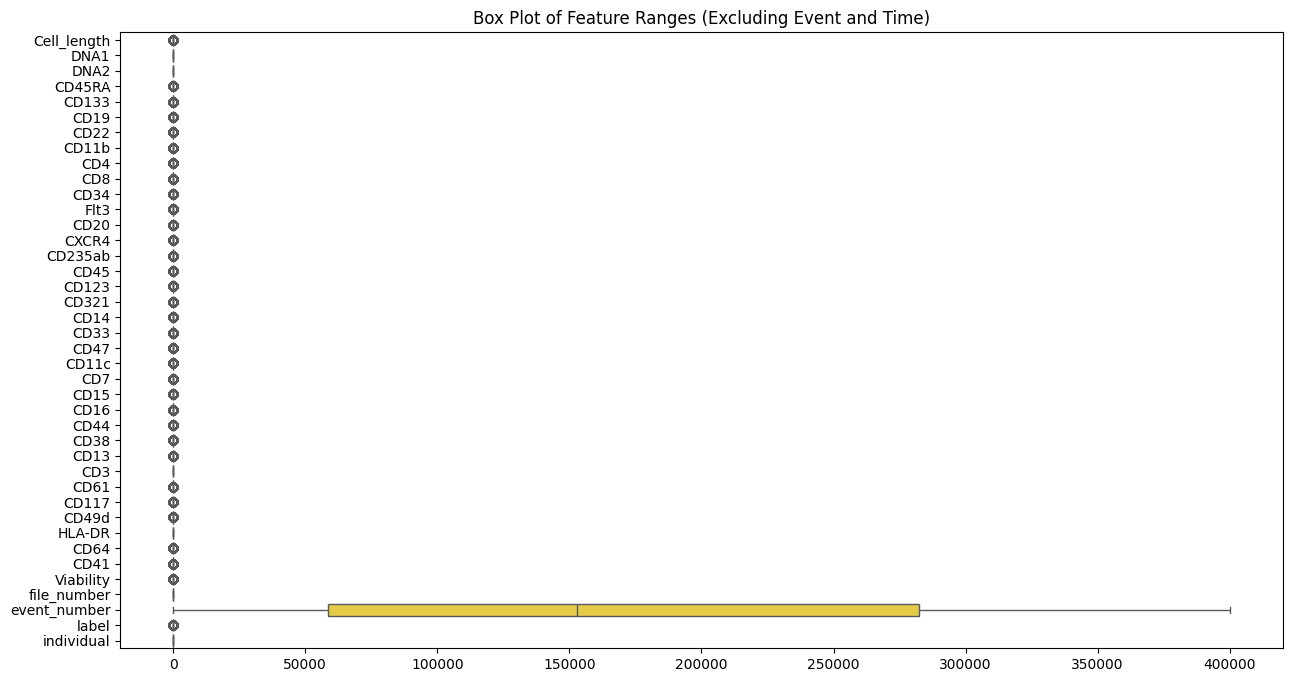

In [ ]:
 data_filtered = data.drop(['Event', 'Time'], axis=1)
 data_description = data_filtered.describe()
 # Display the min and max values for each feature
 print(data_description.loc[['min', 'max']])
 # Optional: Visualize the range of each feature using box plots
 plt.figure(figsize=(15, 8))
 sns.boxplot(data=data_filtered, orient='h', palette='Set2')
 plt.title('Box Plot of Feature Ranges (Excluding Event and Time)')
 plt.show()



<ipython-input-9-592c63dab22c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis')


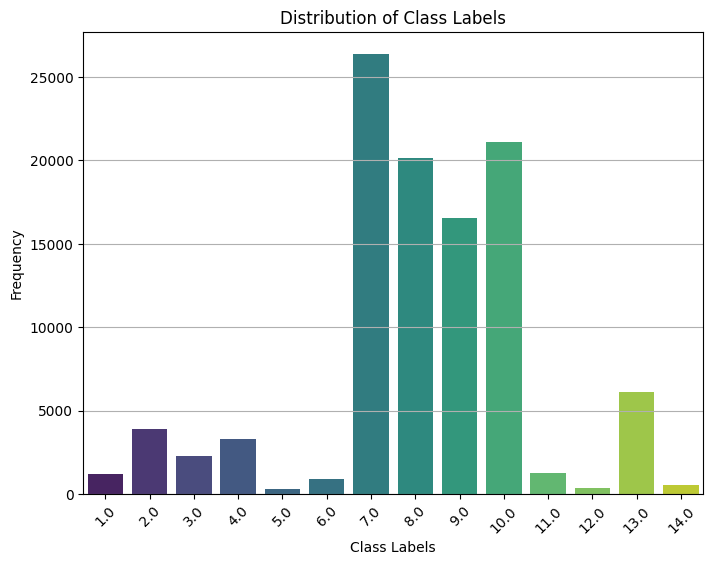

In [ ]:
# Drop null values from the 'label' column
class_distribution = data['label'].dropna().value_counts()

# Plot the distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis')
plt.xlabel('Class Labels')
plt.ylabel('Frequency')
plt.title('Distribution of Class Labels')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


# Remove null values from the 'label' column
data = data[data['label'].notnull()]

# Calculate the distribution of class labels
class_distribution = data['label'].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.xlabel('Class Labels')
plt.ylabel('Frequency')
plt.title('Distribution of Class Labels')
plt.xticks(rotation=45)
plt.show()


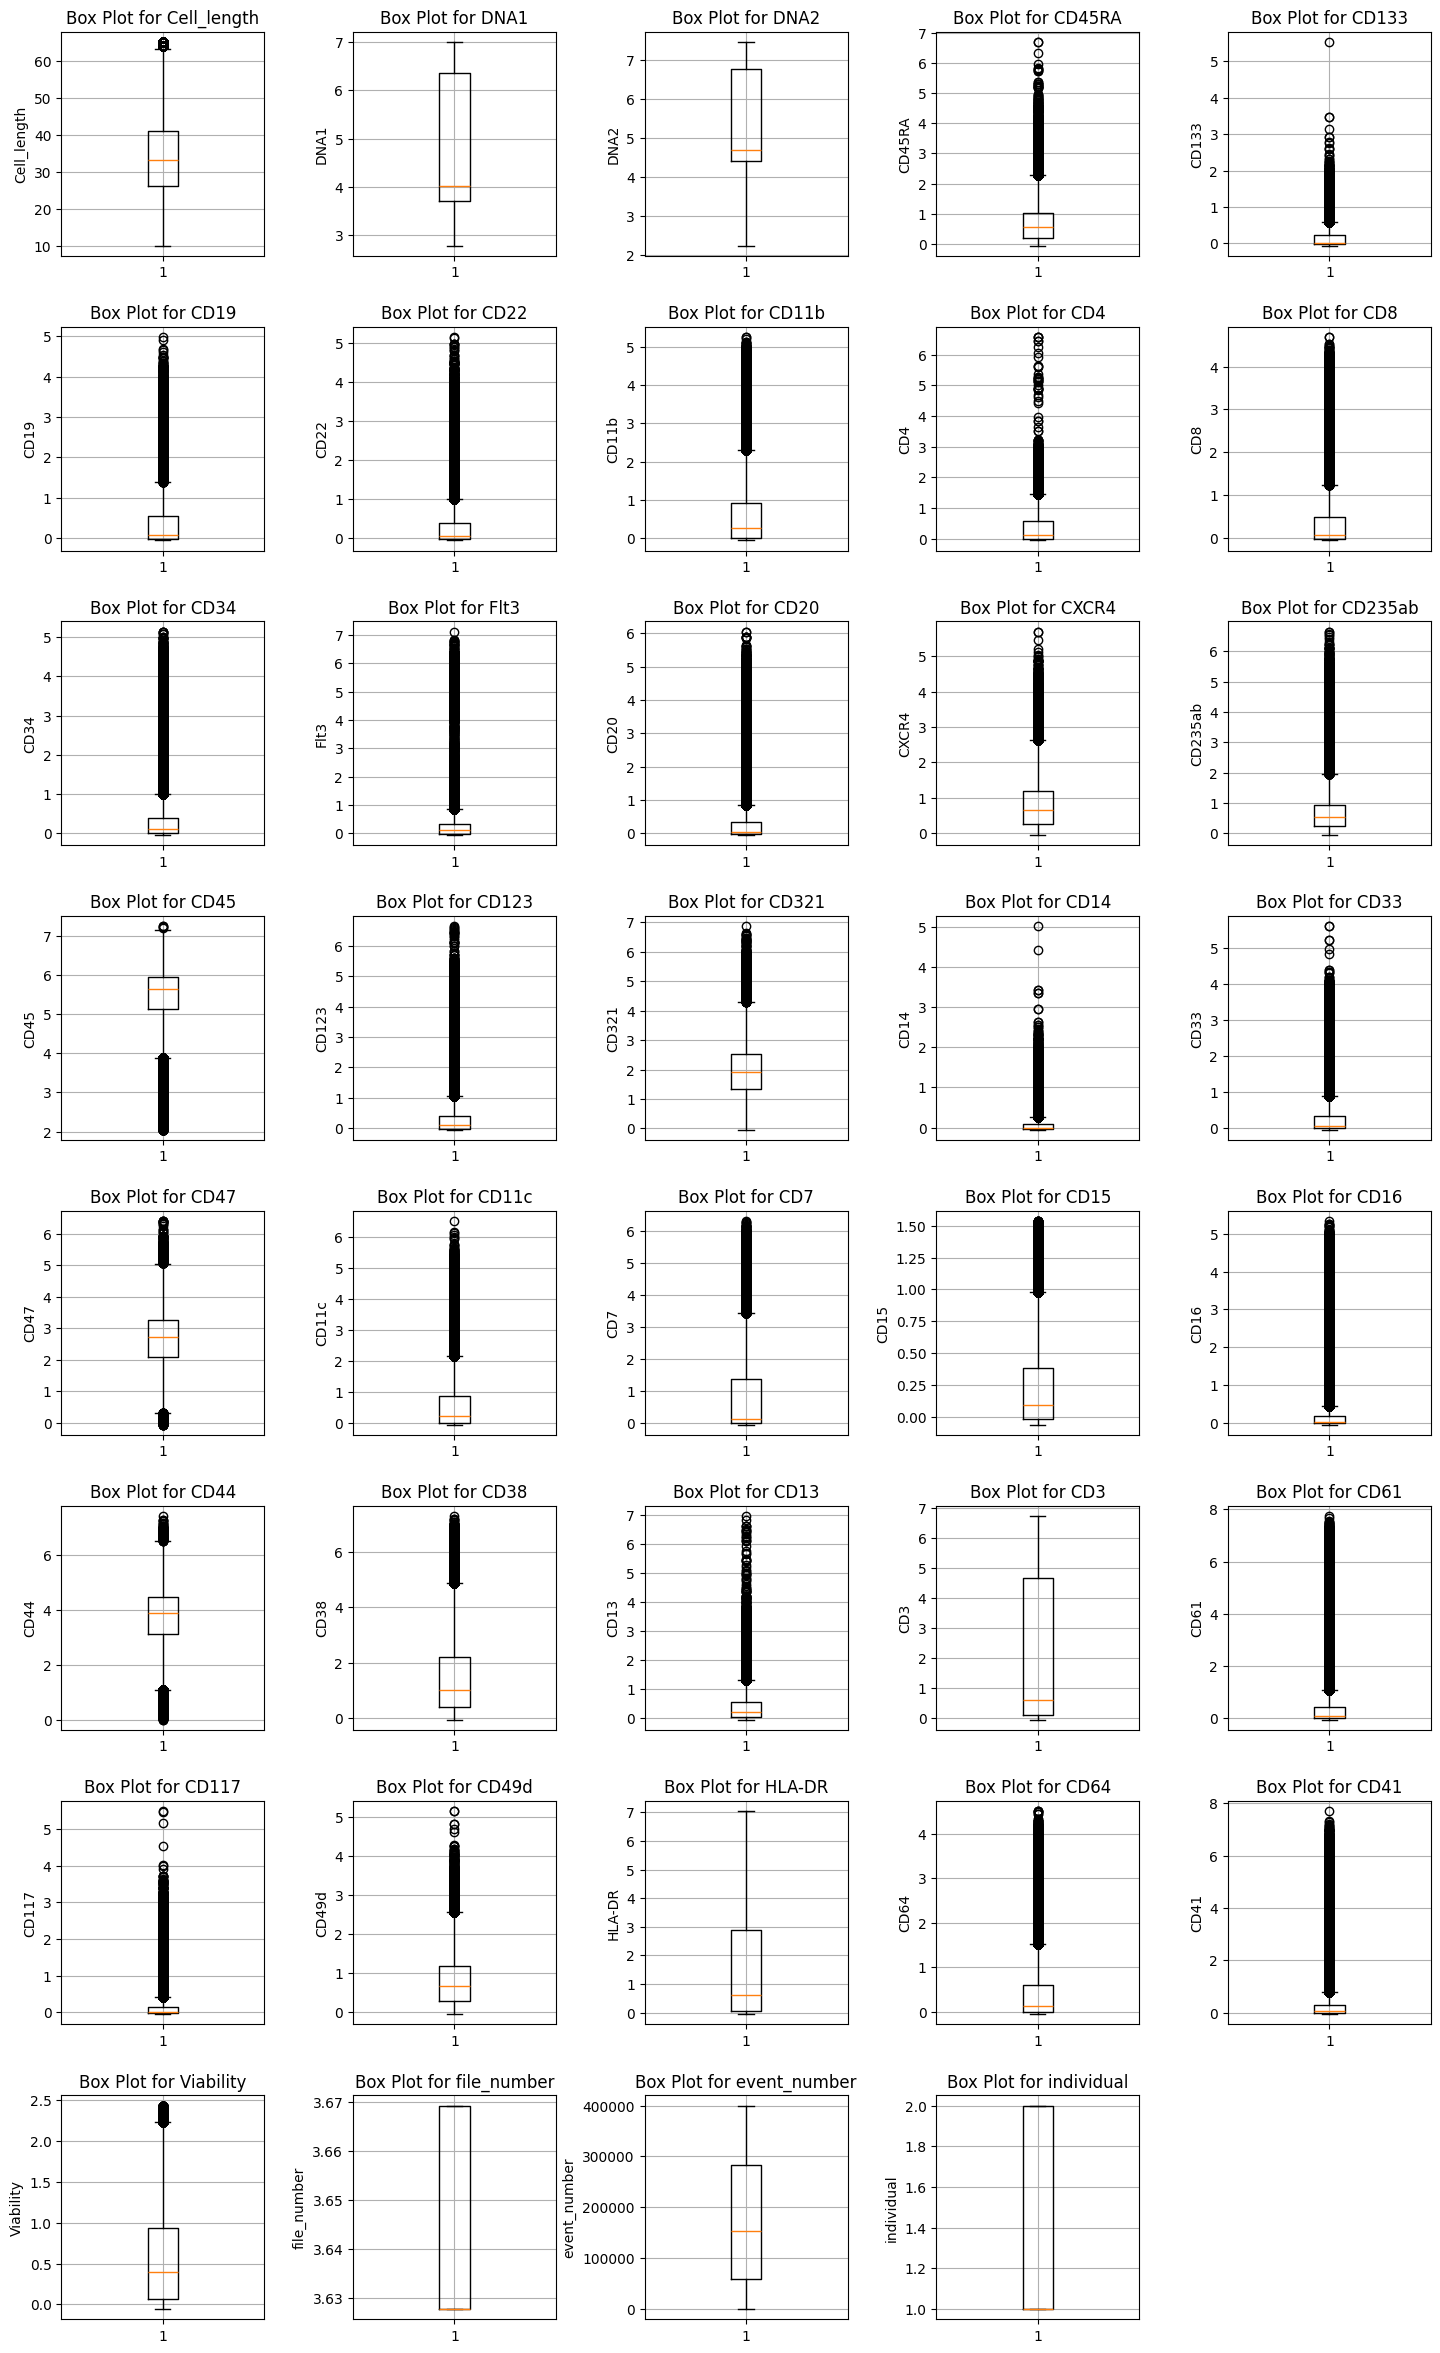

In [ ]:



# List of features to analyze, excluding 'Event', 'Time', and 'label' columns
features = [col for col in data.columns if col not in ['Event', 'Time', 'label']]

# Define the number of plots per row
plots_per_row = 5
# Calculate the total number of rows needed
num_rows = (len(features) + plots_per_row - 1) // plots_per_row

# Set the figure size (width x height)
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(15, num_rows * 3))
fig.tight_layout(pad=3)

# Iterate over each feature and plot its box plot in the grid
for i, feature in enumerate(features):
    row = i // plots_per_row
    col = i % plots_per_row
    ax = axes[row, col] if num_rows > 1 else axes[col]

    ax.boxplot(data[feature].dropna())  # Box plot for the current feature
    ax.set_title(f'Box Plot for {feature}')
    ax.set_ylabel(feature)
    ax.grid()

# Hide any unused subplots
for i in range(len(features), num_rows * plots_per_row):
    row = i // plots_per_row
    col = i % plots_per_row
    ax = axes[row, col] if num_rows > 1 else axes[col]
    ax.axis('off')

# Display the plots
plt.show()



In [ ]:
# Calculate min and max values for each feature (excluding 'Event' and 'Time')
features = data.columns.difference(['Event', 'Time'])

# Get min and max values
min_max_values = data[features].agg(['min', 'max'])

# Display the min and max values
print(min_max_values)


        CD117     CD11b     CD11c     CD123      CD13     CD133      CD14  \
min -0.057668 -0.058236 -0.058053 -0.058003 -0.057728 -0.058081 -0.057954   
max  5.502125  5.260789  6.520939  6.640626  6.981187  5.527494  5.006121   

         CD15      CD16      CD19  ...  Cell_length      DNA1      DNA2  \
min -0.058077 -0.057780 -0.058089  ...           10  2.786488  2.236450   
max  1.534151  5.338305  4.990085  ...           65  7.001489  7.472308   

         Flt3    HLA-DR  Viability  event_number  file_number  individual  \
min -0.057884 -0.057974  -0.057979             1     3.627711           1   
max  7.117323  7.052507   2.433031        400112     3.669327           2   

     label  
min    1.0  
max   14.0  

[2 rows x 40 columns]


In [ ]:
import pandas as pd
from scipy.stats import kurtosis

# Exclude 'Event' and 'Time' columns
features = data.columns.difference(['Event', 'Time'])

# Calculate skewness and kurtosis for each feature
skewness = data[features].skew()  # Calculate skewness
kurtosis_values = data[features].apply(lambda x: kurtosis(x, fisher=False))  # Calculate kurtosis

# Create a DataFrame to hold skewness and kurtosis values
skew_kurt_df = pd.DataFrame({
    'Skewness': skewness,
    'Kurtosis': kurtosis_values
})

# Display the skewness and kurtosis DataFrame
print("Skewness and Kurtosis for each feature:")
print(skew_kurt_df)


Skewness and Kurtosis for each feature:
              Skewness   Kurtosis
CD117         4.097531  26.375108
CD11b         1.679098   4.964495
CD11c         1.733898   5.117156
CD123         3.648911  18.361217
CD13          2.234324  10.637564
CD133         2.141965   9.190066
CD14          3.609026  23.062535
CD15          1.445155   4.504387
CD16          5.733236  42.287749
CD19          1.682619   4.590887
CD20          2.754715  10.435449
CD22          2.283194   7.500223
CD235ab       2.001491  13.440586
CD3           0.342241   1.264612
CD321         0.247098   2.914593
CD33          2.724993  10.967536
CD34          3.492457  16.596416
CD38          1.141488   3.521190
CD4           1.622053   5.844261
CD41          5.366344  41.521113
CD44         -0.431592   2.918792
CD45         -1.484832   5.246770
CD45RA        1.191601   4.964272
CD47         -0.250324   2.943834
CD49d         0.856810   3.468119
CD61          4.894735  34.878020
CD64          1.743742   4.910631
CD7     

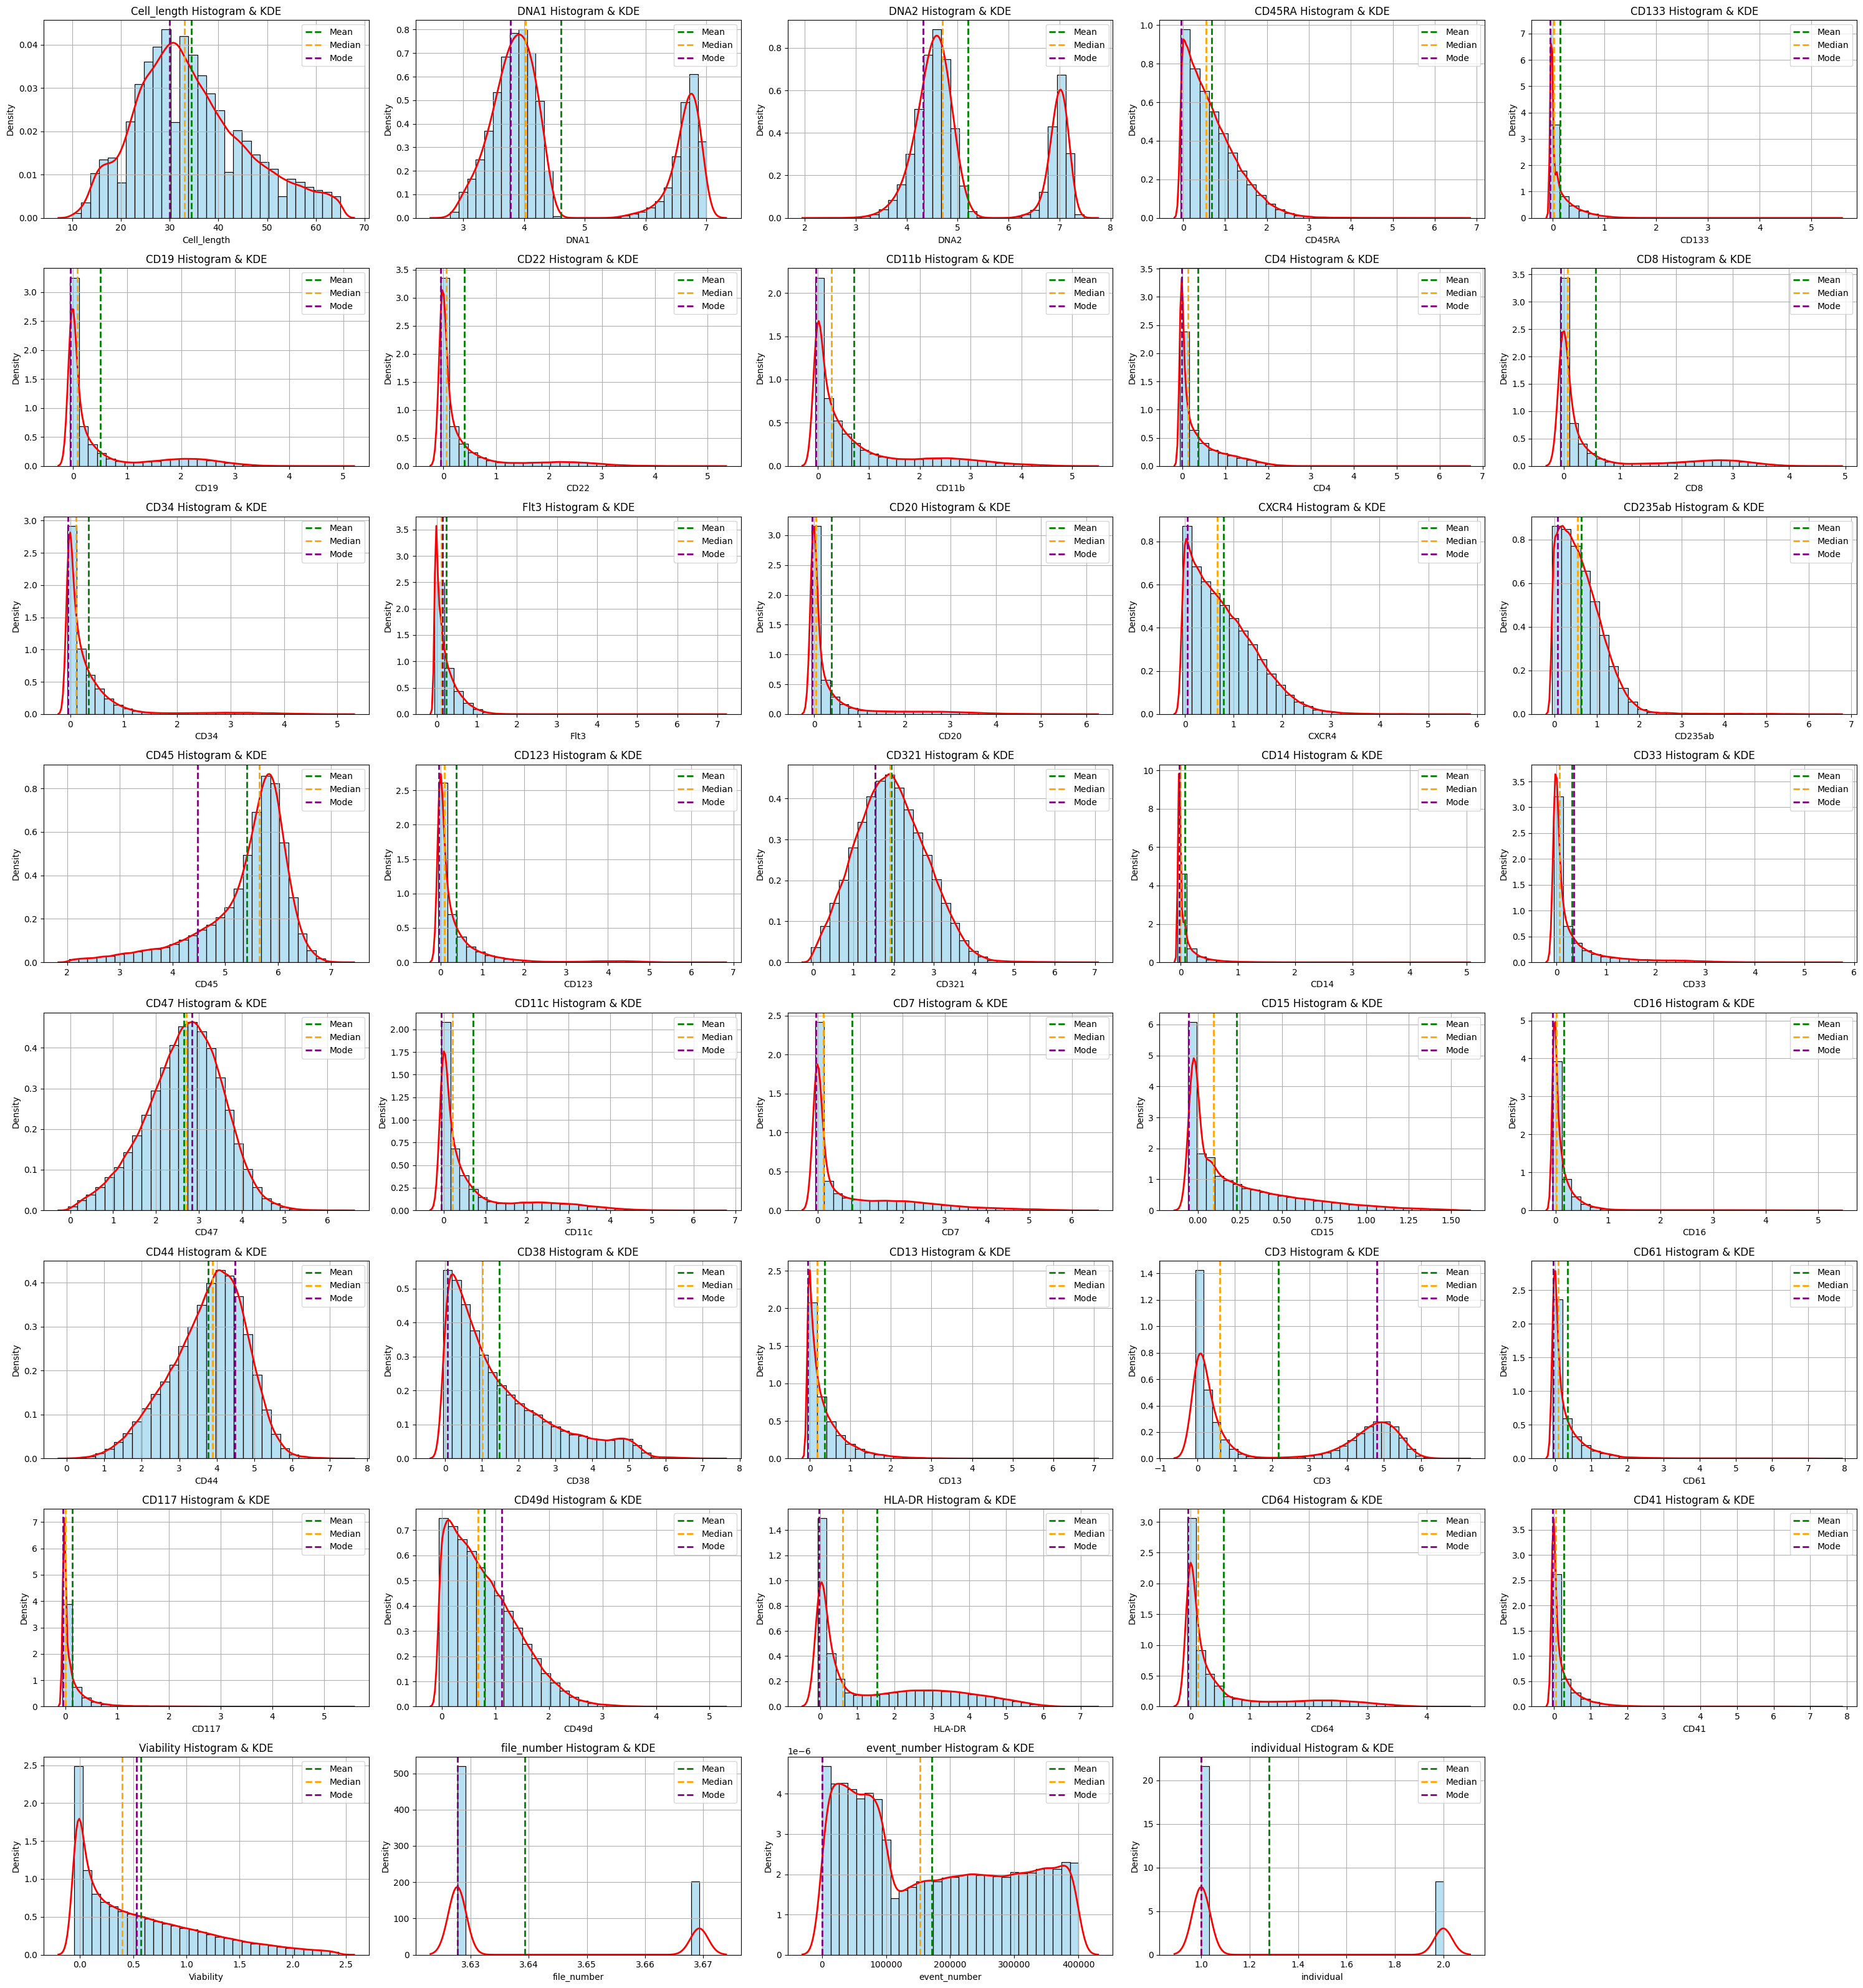

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# List of features to analyze, excluding any unnecessary columns
features = [col for col in data.columns if col not in ['Event', 'Time', 'label']]  # Modify exclusions as needed

# Set number of plots per row
plots_per_row = 5
num_features = len(features)

# Calculate the number of rows needed
num_rows = (num_features // plots_per_row) + int(num_features % plots_per_row != 0)

# Create subplots with the calculated number of rows and columns
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(plots_per_row * 6, num_rows * 4))
axes = axes.flatten()  # Flatten for easy indexing

# Loop through each feature and create the histogram and KDE plot
for idx, feature_name in enumerate(features):
    feature_data = data[feature_name].dropna()  # Remove NaN values for the feature

    # Calculate mean, median, and mode
    mean_value = feature_data.mean()
    median_value = feature_data.median()
    mode_value = feature_data.mode()[0] if not feature_data.mode().empty else mean_value  # Handle empty mode case

    # Plot histogram and KDE
    sns.histplot(feature_data, bins=30, kde=True, color='skyblue', stat='density', ax=axes[idx], alpha=0.6)
    sns.kdeplot(feature_data, color='red', ax=axes[idx], linewidth=2)

    # Add lines for mean, median, and mode
    axes[idx].axvline(mean_value, color='green', linestyle='dashed', linewidth=2, label='Mean')
    axes[idx].axvline(median_value, color='orange', linestyle='dashed', linewidth=2, label='Median')
    axes[idx].axvline(mode_value, color='purple', linestyle='dashed', linewidth=2, label='Mode')

    # Customize each plot
    axes[idx].set_title(f'{feature_name} Histogram & KDE')
    axes[idx].set_xlabel(feature_name)
    axes[idx].set_ylabel('Density')
    axes[idx].legend()
    axes[idx].grid(True)

# Hide any unused subplots
for i in range(idx + 1, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


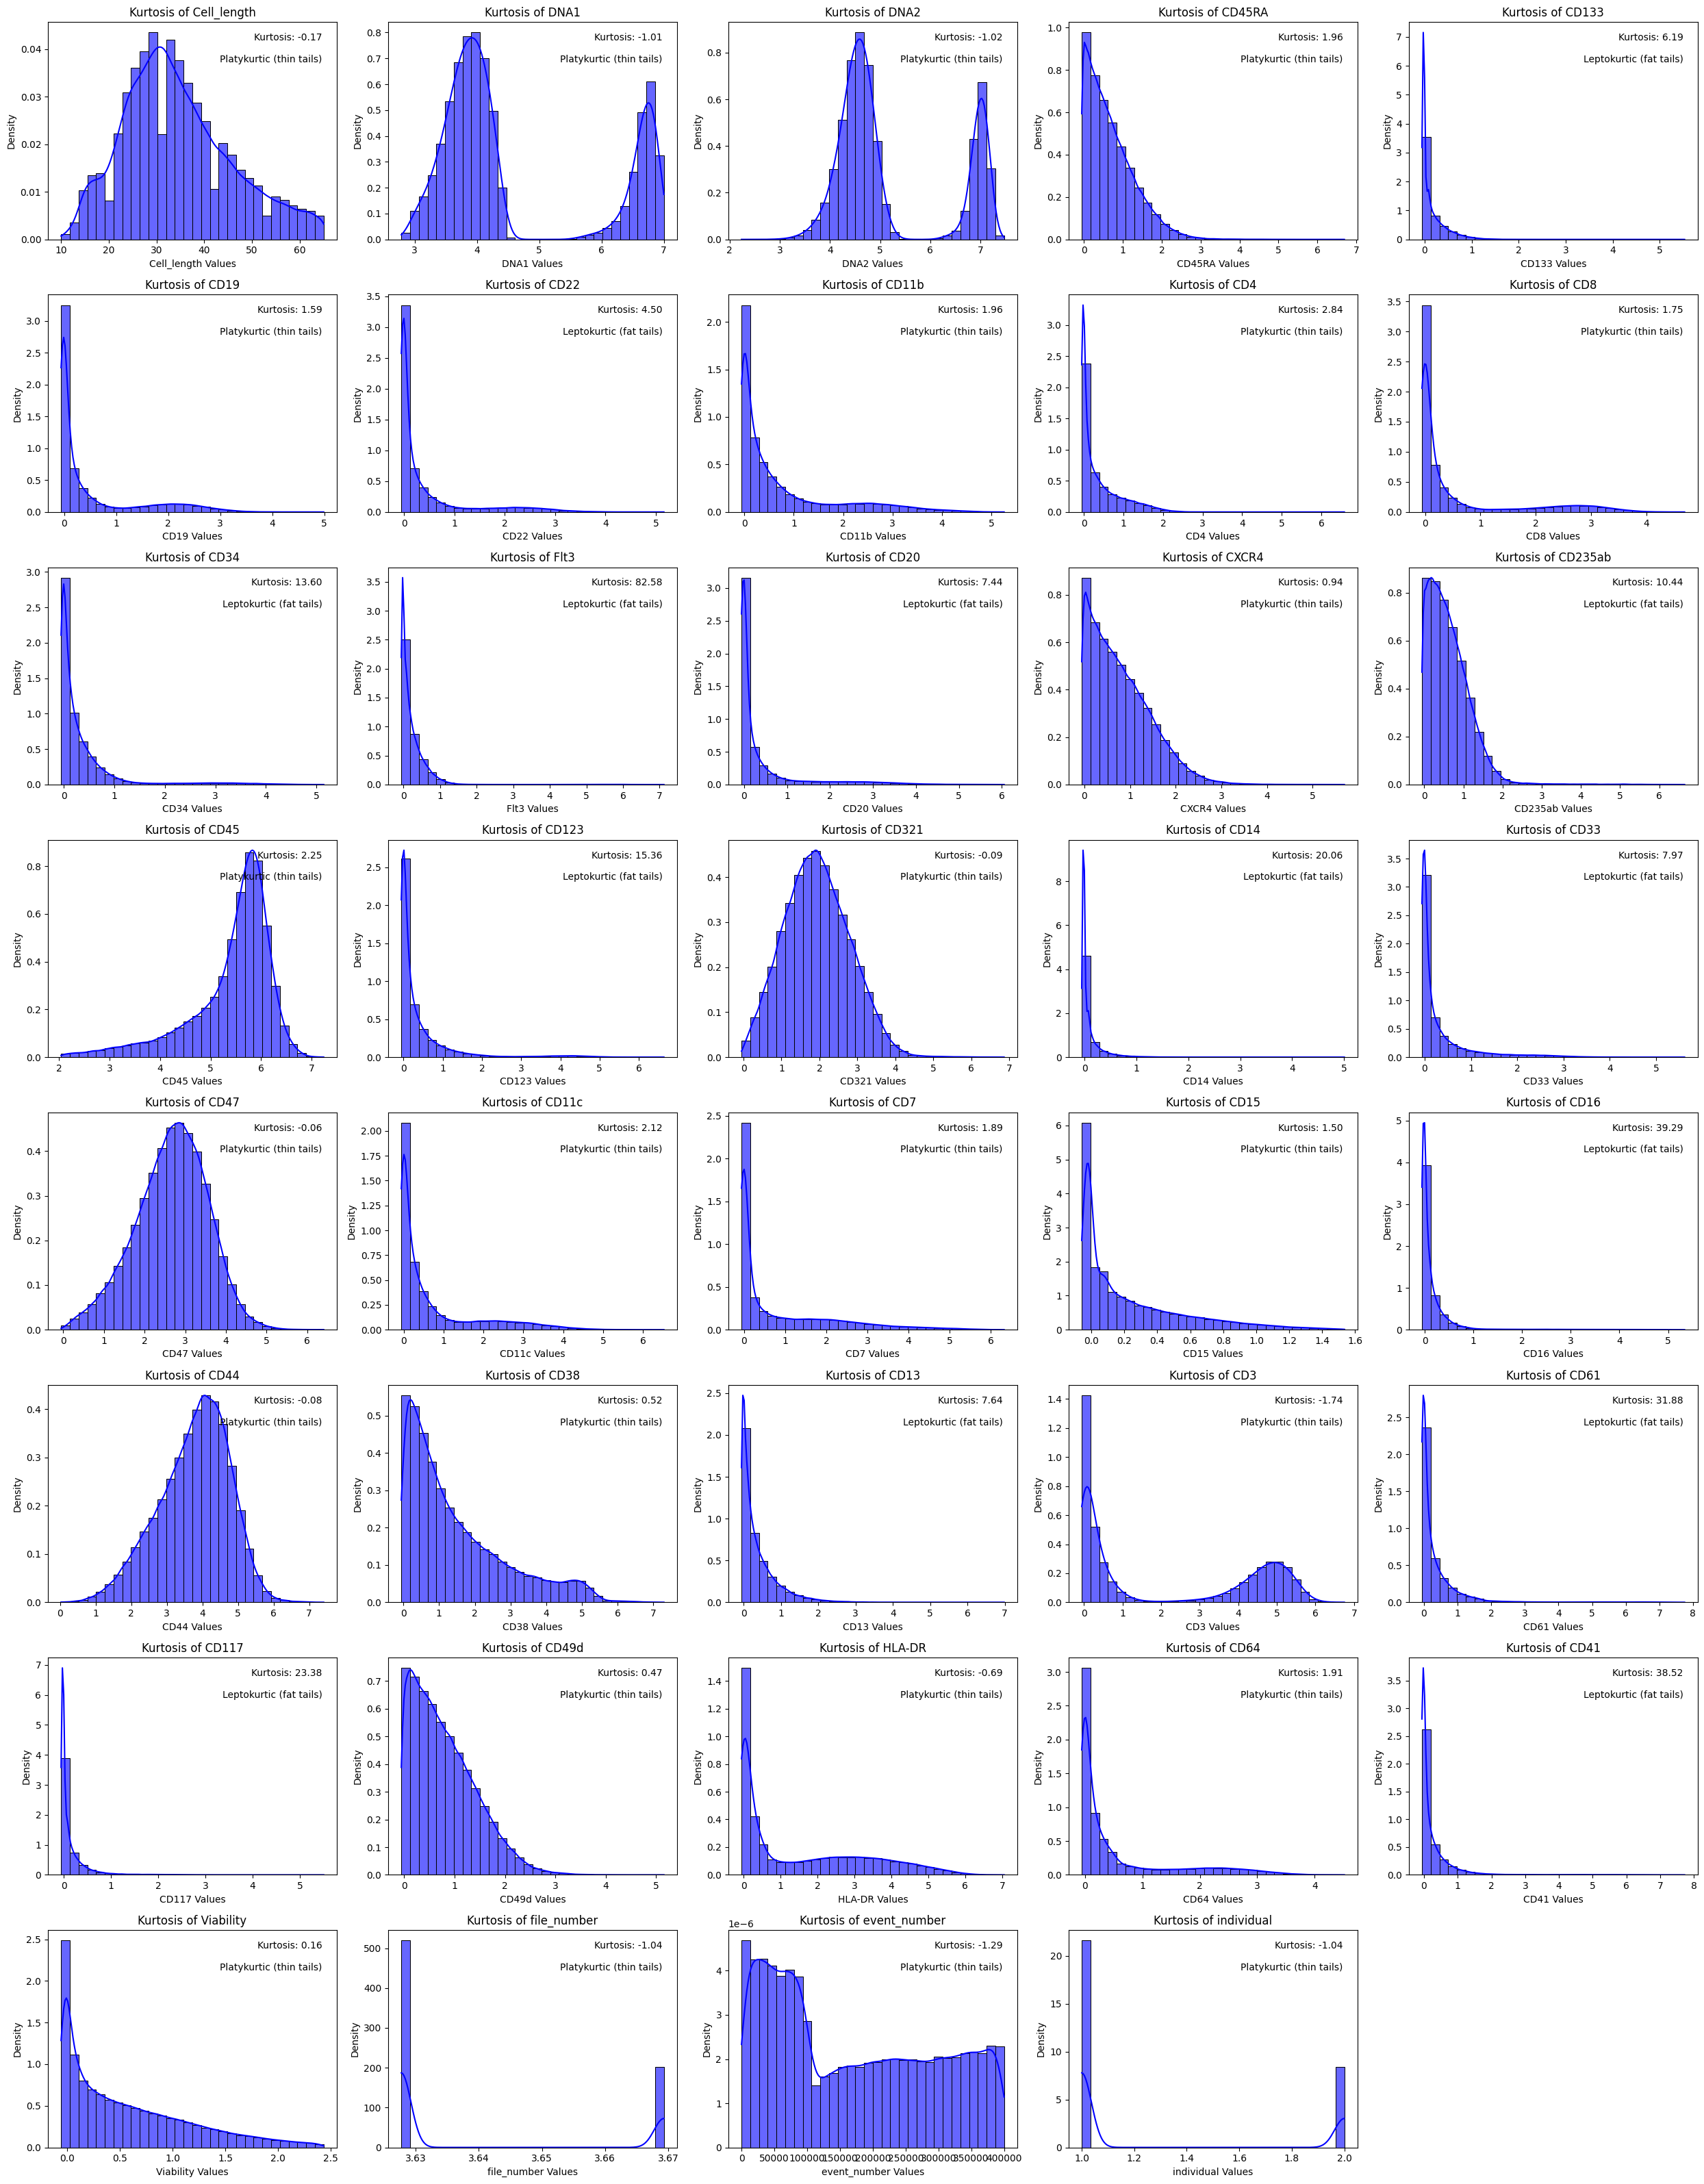

In [ ]:

from scipy.stats import kurtosis

# List of features to analyze, excluding any unnecessary columns
features = [col for col in data.columns if col not in ['Event', 'Time', 'label']]  # Modify exclusions as needed

# Set up the grid layout for 5 plots per row
plots_per_row = 5
num_features = len(features)
num_rows = (num_features // plots_per_row) + (num_features % plots_per_row > 0)

# Create subplots with the calculated number of rows and columns
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(plots_per_row * 5, num_rows * 4))
axes = axes.flatten()  # Flatten for easy indexing

# Iterate over each feature to plot its kurtosis
for idx, feature_name in enumerate(features):
    feature_data = data[feature_name].dropna()  # Remove any NaN values for the feature

    # Calculate kurtosis
    kurtosis_value = kurtosis(feature_data)

    # Plot histogram and KDE
    sns.histplot(feature_data, bins=30, kde=True, color='blue', stat='density', ax=axes[idx], alpha=0.6)

    # Display kurtosis on the plot
    axes[idx].text(0.95, 0.95, f'Kurtosis: {kurtosis_value:.2f}',
                   horizontalalignment='right', verticalalignment='top',
                   transform=axes[idx].transAxes, fontsize=10)

    # Add a description of kurtosis type based on the value
    if kurtosis_value < 3:
        kurtosis_type = "Platykurtic (thin tails)"
    elif kurtosis_value == 3:
        kurtosis_type = "Mesokurtic (medium tails)"
    else:
        kurtosis_type = "Leptokurtic (fat tails)"

    axes[idx].text(0.95, 0.85, kurtosis_type,
                   horizontalalignment='right', verticalalignment='top',
                   transform=axes[idx].transAxes, fontsize=10)

    # Customize each plot
    axes[idx].set_title(f'Kurtosis of {feature_name}')
    axes[idx].set_xlabel(f'{feature_name} Values')
    axes[idx].set_ylabel('Density')

# Hide any unused subplots
for i in range(len(features), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler

# Exclude 'Event' and 'Time' columns for standardization
features_to_standardize = data.columns.difference(['Event', 'Time'])

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform it
data_standardized = data.copy()  # Make a copy of the original data
data_standardized[features_to_standardize] = scaler.fit_transform(data[features_to_standardize])

# Display the first few rows of the standardized data
print(data_standardized.head())


   Event    Time  Cell_length      DNA1      DNA2    CD45RA     CD133  \
0      1  2693.0    -1.087702 -0.164453 -0.505101 -0.862639 -0.677085   
1      2  3736.0     0.047999 -0.202977 -0.331737  0.021706 -0.710621   
2      3  7015.0    -0.214086 -0.585171 -0.705816 -0.138826 -0.687231   
3      4  7099.0    -0.476171 -0.267476 -0.320127 -0.417630 -0.669470   
4      5  7700.0    -0.825617 -0.479916 -0.601444 -1.144201 -0.679832   

       CD19      CD22     CD11b  ...     CD117     CD49d    HLA-DR      CD64  \
0 -0.601774 -0.434227 -0.711371  ... -0.249511  0.093316  0.084209 -0.626606   
1 -0.613387 -0.423702  0.096608  ... -0.132623 -0.951407 -0.608084 -0.457614   
2 -0.507832 -0.577727 -0.704150  ... -0.271310  2.854812 -0.126003 -0.632890   
3 -0.614562 -0.579163  0.023115  ... -0.206663  0.866341 -0.815301 -0.635690   
4 -0.500173  0.129202  0.392818  ... -0.438757 -0.978326 -0.781769 -0.534854   

       CD41  Viability  file_number  event_number     label  individual  
0 -0.4

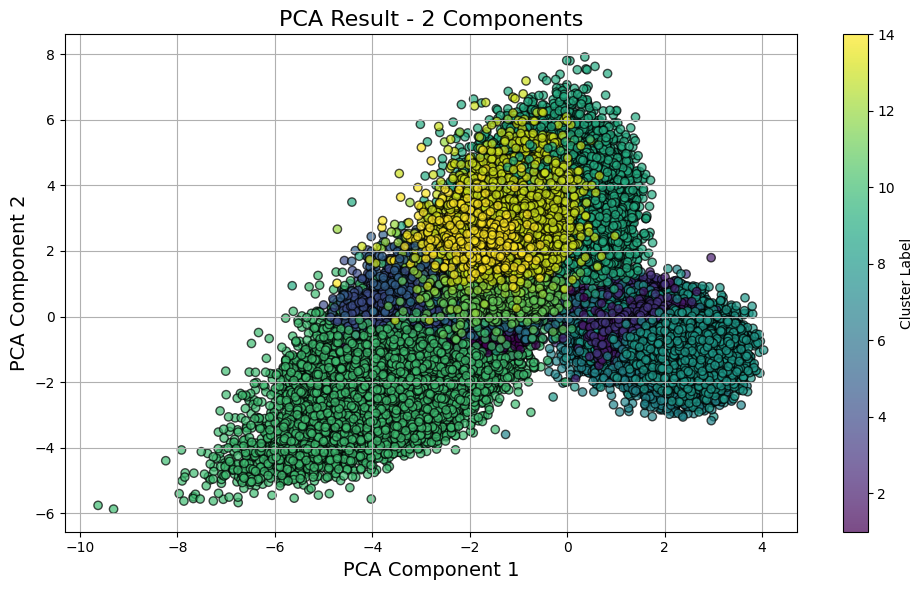

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Exclude the specified columns for PCA
exclude_columns = ['Event', 'Time', 'Cell_length', 'file_number', 'event_number', 'label', 'individual']
features_for_analysis = data.columns.difference(exclude_columns)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[features_for_analysis])

# Perform PCA for 2 components
pca_2d = PCA(n_components=2)
pca_result_2d = pca_2d.fit_transform(scaled_data)

# Create a DataFrame for the 2D PCA results
pca_df_2d = pd.DataFrame(data=pca_result_2d, columns=['PCA Component 1', 'PCA Component 2'])

# Plot the 2D PCA results with different colors for each cluster
plt.figure(figsize=(10, 6))
plt.scatter(pca_df_2d['PCA Component 1'], pca_df_2d['PCA Component 2'], c=data['label'], cmap='viridis', edgecolor='k', alpha=0.7)
plt.title('PCA Result - 2 Components', fontsize=16)
plt.xlabel('PCA Component 1', fontsize=14)
plt.ylabel('PCA Component 2', fontsize=14)
plt.colorbar(label='Cluster Label')
plt.grid()
plt.tight_layout()
plt.show()

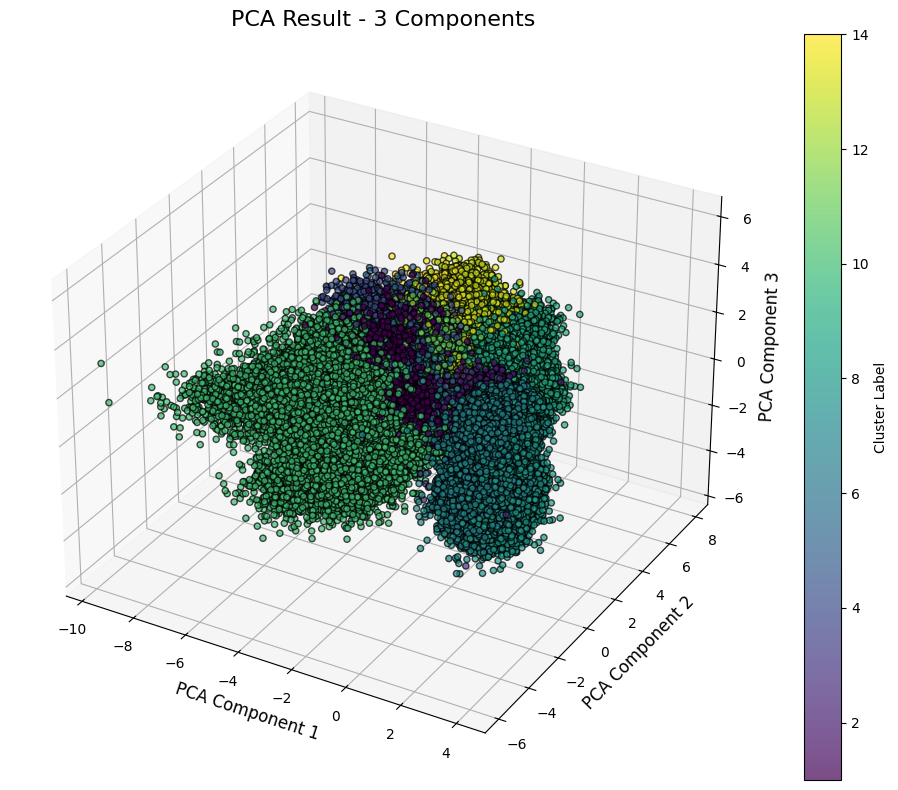

In [ ]:
# Perform PCA for 3 components
pca_3d = PCA(n_components=3)
pca_result_3d = pca_3d.fit_transform(scaled_data)

# Create a DataFrame for the 3D PCA results
pca_df_3d = pd.DataFrame(data=pca_result_3d, columns=['PCA Component 1', 'PCA Component 2', 'PCA Component 3'])

# Plot the 3D PCA results with different colors for each cluster
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_df_3d['PCA Component 1'], pca_df_3d['PCA Component 2'], pca_df_3d['PCA Component 3'],
                     c=data['label'], cmap='viridis', edgecolor='k', alpha=0.7)
ax.set_title('PCA Result - 3 Components', fontsize=16)
ax.set_xlabel('PCA Component 1', fontsize=12)
ax.set_ylabel('PCA Component 2', fontsize=12)
ax.set_zlabel('PCA Component 3', fontsize=12)
fig.colorbar(scatter, ax=ax, label='Cluster Label')
plt.tight_layout()
plt.show()


In [ ]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Exclude the specified columns for PCA
exclude_columns = ['Event', 'Time', 'Cell_length', 'file_number', 'event_number', 'label', 'individual']
features_for_analysis = data.columns.difference(exclude_columns)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[features_for_analysis])

# Perform PCA
pca = PCA()  # Fit PCA to all components to calculate explained variance
pca.fit(scaled_data)

# Create a DataFrame for the PCA summary
pca_summary = pd.DataFrame({
    'Standard Deviation': pca.explained_variance_**0.5,
    'Proportion of Variance': pca.explained_variance_ratio_,
    'Cumulative Proportion': pca.explained_variance_ratio_.cumsum()
}, index=[f'PC{i+1}' for i in range(len(pca.explained_variance_))])

# Display the table
print(pca_summary)


      Standard Deviation  Proportion of Variance  Cumulative Proportion
PC1             2.327669                0.154801               0.154801
PC2             1.957437                0.109473               0.264273
PC3             1.877982                0.100766               0.365039
PC4             1.606712                0.073758               0.438797
PC5             1.402681                0.056214               0.495011
PC6             1.243363                0.044170               0.539181
PC7             1.169659                0.039088               0.578270
PC8             1.126861                0.036280               0.614550
PC9             1.079842                0.033316               0.647866
PC10            0.963012                0.026497               0.674363
PC11            0.951218                0.025852               0.700214
PC12            0.906304                0.023468               0.723682
PC13            0.891029                0.022684               0

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


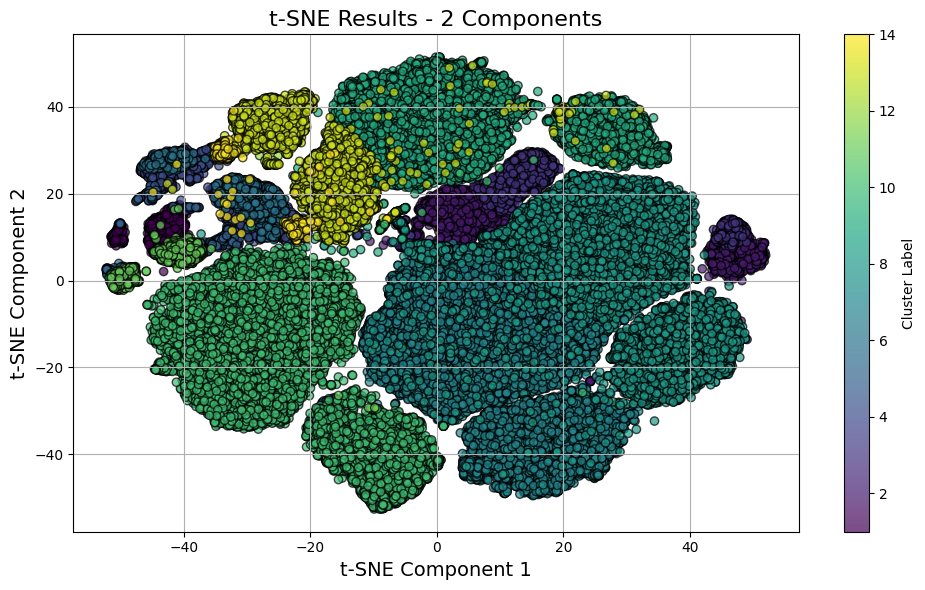

In [ ]:

from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Exclude specified columns from the dataset
exclude_columns = ['Event', 'Time', 'Cell_length', 'file_number', 'event_number', 'label', 'individual']
data_filtered = data.drop(columns=exclude_columns)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_filtered)

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=500, random_state=42)
tsne_result = tsne.fit_transform(scaled_data)

# Plot the t-SNE results with different colors for each cluster
plt.figure(figsize=(10, 6))
scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=data['label'], cmap='viridis', edgecolor='k', alpha=0.7)
plt.title('t-SNE Results - 2 Components', fontsize=16)
plt.xlabel('t-SNE Component 1', fontsize=14)
plt.ylabel('t-SNE Component 2', fontsize=14)
plt.colorbar(scatter, label='Cluster Label')
plt.grid()
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Create a sample DataFrame called 'demodata' for demonstration
np.random.seed(42)
demodata = pd.DataFrame({
    'column1': [5, 12, 18, 7],
    'column2': [10, 20, 15, 30],
    'column3': [8, 25, 35, 40]
})

# Define the probability of masking (e.g., 0.3 means a 30% chance each element will be masked)
p_m = 0.3

# Convert 'demodata' to a NumPy array for masking
data_array = demodata.values

# Generate a binary mask based on the probability
mask = np.random.binomial(1, p_m, data_array.shape)


# Apply the mask to the data array, setting masked elements to NaN

masked_data = np.where(mask, np.nan, data_array)

# Convert back to a DataFrame for easier analysis
masked_demodata = pd.DataFrame(masked_data, columns=demodata.columns)

print("Original DataFrame (demodata):\n", demodata)
print("\nMasked DataFrame (masked_demodata):\n", masked_demodata)


Original DataFrame (demodata):
    column1  column2  column3
0        5       10        8
1       12       20       25
2       18       15       35
3        7       30       40

Masked DataFrame (masked_demodata):
    column1  column2  column3
0      5.0      NaN      NaN
1     12.0     20.0     25.0
2     18.0      NaN     35.0
3      NaN     30.0      NaN


In [ ]:
import pandas as pd
import numpy as np

# Create a sample DataFrame
np.random.seed(42)
demodata = pd.DataFrame({
    'column1': [5, 12, 18, 7],
    'column2': [10, 20, 15, 30],
    'column3': [8, 25, 35, 40]
})

# Define the probability of masking (e.g., 0.3 means a 30% chance each element will be masked)
p_m = 0.3

# Convert 'demodata' to a NumPy array for masking
data_array = demodata.values

# Generate a binary mask based on the probability, where 1 = not masked, 0 = masked
mask = np.random.binomial(1, 1 - p_m, data_array.shape)  # Reverse probability for desired 1/0 output

# Convert to a DataFrame for easier analysis
binary_mask_df = pd.DataFrame(mask, columns=demodata.columns)

print("Original DataFrame :\n", demodata)
print("\nBinary Mask DataFrame :\n", binary_mask_df)


Original DataFrame :
    column1  column2  column3
0        5       10        8
1       12       20       25
2       18       15       35
3        7       30       40

Binary Mask DataFrame :
    column1  column2  column3
0        1        0        0
1        1        1        1
2        1        0        1
3        0        1        0


In [ ]:
import pandas as pd
import numpy as np

# Create a sample DataFrame called 'demodata' (original data)
demodata = pd.DataFrame({
    'Feature1': [5, 12, 18, 7],
    'Feature2': [10, 20, 15, 30],
    'Feature3': [25, 35, 40, 45]
})

# Define the probability of masking (e.g., 0.3 means a 30% chance each element will be masked)
p_m = 0.3

# Generate a binary mask matrix 'm'
m = np.random.binomial(1, 1 - p_m, demodata.shape)

# Create a DataFrame for the binary mask
binary_mask_df = pd.DataFrame(m, columns=demodata.columns)

# Shuffle each column in 'demodata' independently to create 'demodata_shuffled'
demodata_shuffled = demodata.apply(lambda col: np.random.permutation(col))

# Calculate the corrupted DataFrame 'demodata_corrupted' using the formula
demodata_corrupted_array = demodata.values * (1 - m) + demodata_shuffled.values * m

# Convert the array back to a DataFrame for easier reading
demodata_corrupted = pd.DataFrame(demodata_corrupted_array, columns=demodata.columns)

# Display results
print("Original DataFrame (demodata):\n", demodata)
print("\nBinary Mask DataFrame (m):\n", binary_mask_df)
print("\nShuffled DataFrame (demodata_shuffled):\n", demodata_shuffled)
print("\nCorrupted DataFrame (demodata_corrupted):\n", demodata_corrupted)


Original DataFrame (demodata):
    Feature1  Feature2  Feature3
0         5        10        25
1        12        20        35
2        18        15        40
3         7        30        45

Binary Mask DataFrame (m):
    Feature1  Feature2  Feature3
0         0         1         1
1         1         1         1
2         1         1         1
3         1         1         1

Shuffled DataFrame (demodata_shuffled):
    Feature1  Feature2  Feature3
0        18        10        35
1         5        30        45
2         7        15        25
3        12        20        40

Corrupted DataFrame (demodata_corrupted):
    Feature1  Feature2  Feature3
0         5        10        35
1         5        30        45
2         7        15        25
3        12        20        40


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler


# Exclude the specified columns
exclude_columns = ['Event', 'Time', 'Cell_length', 'file_number', 'event_number']
data_filtered = data.drop(columns=exclude_columns)

# Set the probability of masking
p_m = 0.3

# Generate a binary mask matrix 'm'
m = np.random.binomial(1, 1 - p_m, data_filtered.shape)

# Create a DataFrame for the binary mask
binary_mask_df = pd.DataFrame(m, columns=data_filtered.columns)

# Shuffle each column in 'data_filtered' independently to create 'data_shuffled'
data_shuffled = data_filtered.apply(lambda col: np.random.permutation(col))

# Calculate the corrupted DataFrame 'data_corrupted' using the formula
data_corrupted_array = data_filtered.values * (1 - m) + data_shuffled.values * m

# Convert the array back to a DataFrame for easier readability
data_corrupted = pd.DataFrame(data_corrupted_array, columns=data_filtered.columns)

# Display results
print("Binary Mask DataFrame (m):\n", binary_mask_df)
print("\nShuffled DataFrame (data_shuffled):\n", data_shuffled)
print("\nCorrupted DataFrame (data_corrupted):\n", data_corrupted)


Binary Mask DataFrame (m):
         DNA1  DNA2  CD45RA  CD133  CD19  CD22  CD11b  CD4  CD8  CD34  ...  \
0          0     1       1      1     0     1      1    1    1     1  ...   
1          1     1       1      1     1     1      1    1    0     0  ...   
2          1     1       1      1     1     0      1    1    0     1  ...   
3          1     1       0      1     0     1      0    1    1     1  ...   
4          1     0       1      0     1     1      1    1    1     0  ...   
...      ...   ...     ...    ...   ...   ...    ...  ...  ...   ...  ...   
265622     1     0       1      1     1     1      1    1    1     1  ...   
265623     1     1       1      1     1     1      1    1    1     0  ...   
265624     1     0       1      1     0     0      1    1    1     1  ...   
265625     1     1       1      0     1     0      1    1    1     1  ...   
265626     0     0       1      1     0     1      1    1    1     1  ...   

        CD3  CD61  CD117  CD49d  HLA-DR  CD64  

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Exclude the specified columns
exclude_columns = ['Event', 'Time', 'Cell_length', 'file_number', 'event_number']
data_filtered = data.drop(columns=exclude_columns)

# Set the probability of masking
p_m = 0.3

# Generate a binary mask matrix 'm' (changes every run)
m = np.random.binomial(1, 1 - p_m, data_filtered.shape)
binary_mask_df = pd.DataFrame(m, columns=data_filtered.columns)

# Shuffle each column in 'data_filtered' independently to create 'data_shuffled'
data_shuffled = data_filtered.apply(lambda col: np.random.permutation(col))

# Calculate the corrupted DataFrame 'data_corrupted' using the formula
data_corrupted_array = data_filtered.values * (1 - m) + data_shuffled.values * m
data_corrupted = pd.DataFrame(data_corrupted_array, columns=data_filtered.columns)

# Generate mask_new to indicate differences between original and corrupted data
mask_new = 1 * (data_filtered != data_corrupted)

# Print only the new mask matrix
print("New Mask Matrix (mask_new):\n", mask_new)


New Mask Matrix (mask_new):
         DNA1  DNA2  CD45RA  CD133  CD19  CD22  CD11b  CD4  CD8  CD34  ...  \
0          1     0       1      1     0     1      1    1    0     1  ...   
1          1     1       1      1     1     1      1    1    1     1  ...   
2          1     1       0      1     1     1      0    1    1     1  ...   
3          1     0       1      1     0     1      1    1    0     1  ...   
4          0     1       1      1     0     1      1    0    1     1  ...   
...      ...   ...     ...    ...   ...   ...    ...  ...  ...   ...  ...   
265622     1     1       1      1     1     1      1    1    1     1  ...   
265623     0     1       1      1     0     1      0    0    0     0  ...   
265624     0     0       1      1     1     0      1    1    1     0  ...   
265625     0     0       1      1     1     0      0    0    0     0  ...   
265626     0     1       0      0     1     0      1    1    0     0  ...   

        CD3  CD61  CD117  CD49d  HLA-DR  CD64 

In [ ]:
import numpy as np
import pandas as pd

# Define the target column used for labeling
label_column = 'label'

# Separate labeled and unlabeled data
labeled_data = data[data[label_column].notnull()]  # Labeled data
unlabeled_data = data[data[label_column].isnull()]  # Unlabeled data

# Split features and labels for labeled data
x_labeled = labeled_data.drop(columns=[label_column])
y_labeled = labeled_data[label_column]

# Split features and labels for unlabeled data
x_unlabeled = unlabeled_data.drop(columns=[label_column])
y_unlabeled = unlabeled_data[label_column]

# Display results
print("Labeled Features (x_labeled):\n", x_labeled)
print("\nLabeled Labels (y_labeled):\n", y_labeled)
print("\nUnlabeled Features (x_unlabeled):\n", x_unlabeled)
print("\nUnlabeled Labels (y_unlabeled):\n", y_unlabeled)


Labeled Features (x_labeled):
          Event       Time  Cell_length      DNA1      DNA2    CD45RA  \
0            1    2693.00           22  4.391057  4.617262  0.162691   
1            2    3736.00           35  4.340481  4.816692  0.701349   
2            3    7015.00           32  3.838727  4.386369  0.603568   
3            4    7099.00           29  4.255806  4.830048  0.433747   
4            5    7700.00           25  3.976909  4.506433 -0.008809   
...        ...        ...          ...       ...       ...       ...   
104179  104180  641812.44           58  6.827981  7.249403 -0.000106   
104180  104181  653387.44           55  6.683204  7.166172  0.692668   
104181  104182  671024.44           40  6.911546  7.152603 -0.036795   
104182  104183  680006.44           48  6.700332  7.100771  0.308817   
104183  104184  687494.44           64  6.559460  7.080928  0.519572   

           CD133      CD19      CD22     CD11b  ...      CD61     CD117  \
0      -0.029585 -0.006696  0

In [ ]:
from sklearn.model_selection import train_test_split

# Define the target column used for labeling
label_column = 'label'

# Separate labeled data
labeled_data = data[data[label_column].notnull()]

# Split features and labels for labeled data
x_labeled = labeled_data.drop(columns=[label_column])
y_labeled = labeled_data[label_column]

# Split labeled data into training and testing sets (70%-30% split)
x_train, x_test, y_train, y_test = train_test_split(x_labeled, y_labeled, test_size=0.3, random_state=42)

# Display results
print("Training Features (x_train):\n", x_train)
print("\nTesting Features (x_test):\n", x_test)
print("\nTraining Labels (y_train):\n", y_train)
print("\nTesting Labels (y_test):\n", y_test)


Training Features (x_train):
          Event       Time  Cell_length      DNA1      DNA2    CD45RA  \
64113    64114  401196.00           25  3.899656  4.594272  0.976652   
82744    82745  502826.44           31  6.592998  6.901888  0.431481   
24294    24295  488377.00           41  3.543583  4.467671  0.377192   
7820      7821  225689.00           38  4.305227  4.881685  0.199351   
43295    43296  153333.00           26  4.159271  4.861015  0.831285   
...        ...        ...          ...       ...       ...       ...   
54886    54887   93991.00           15  4.074604  4.747052  0.431805   
76820    76821   46189.00           33  6.584427  6.882117  0.640424   
103694  103695  574005.44           43  6.719895  7.080995  0.306443   
860        861  516979.00           26  3.886782  4.886936  0.060176   
15795    15796  225860.00           25  3.523293  4.289820  0.646288   

           CD133      CD19      CD22     CD11b  ...      CD61     CD117  \
64113   0.302811  0.154761 -0.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler



# Define the target column used for labeling
label_column = 'label'

# Separate labeled data
labeled_data = data[data[label_column].notnull()]

# Split features and labels for labeled data
x_labeled = labeled_data.drop(columns=[label_column])
y_labeled = labeled_data[label_column]

# Encode labels if necessary (e.g., for non-numeric labels)
label_encoder = LabelEncoder()
y_labeled = label_encoder.fit_transform(y_labeled)

# Split labeled data into training and testing sets (70%-30% split)
x_train, x_test, y_train, y_test = train_test_split(
    x_labeled, y_labeled, test_size=0.3, random_state=42
)

# Scale features for Logistic Regression and XGBoost
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Logistic Regression Model with increased max_iter and scaled data
logistic_model = LogisticRegression(max_iter=2000)
logistic_model.fit(x_train_scaled, y_train)
y_test_hat_logistic = logistic_model.predict_proba(x_test_scaled)

# XGBoost Model (using scaled data)
xgb_model = XGBClassifier(eval_metric='mlogloss')
xgb_model.fit(x_train_scaled, y_train)  # Use scaled data for training
y_test_hat_xgb = xgb_model.predict_proba(x_test_scaled)  # Use scaled test data

# Display the predicted probabilities for Logistic Regression and XGBoost
print("Logistic Regression Predicted Probabilities:\n", y_test_hat_logistic)
print("\nXGBoost Predicted Probabilities:\n", y_test_hat_xgb)


Logistic Regression Predicted Probabilities:
 [[8.71532014e-11 7.15777512e-16 5.86413813e-12 ... 3.71679134e-10
  2.57615664e-08 2.92952487e-08]
 [3.89684389e-14 5.45734530e-13 1.08967360e-13 ... 9.25120234e-10
  3.73081989e-05 6.16167181e-09]
 [1.84225273e-11 5.90550517e-10 1.12355888e-11 ... 1.59113271e-11
  1.62867176e-05 6.66716711e-10]
 ...
 [5.05774251e-10 1.66206209e-05 5.93223532e-09 ... 3.54583853e-09
  3.57005965e-11 9.95221511e-09]
 [6.94828818e-11 7.05048242e-10 2.51660858e-10 ... 1.19779551e-11
  1.34185138e-06 2.54193721e-06]
 [3.32647156e-10 1.39746319e-06 5.84840147e-10 ... 1.09125624e-13
  1.93385444e-05 1.73712999e-10]]

XGBoost Predicted Probabilities:
 [[8.8804103e-07 8.2875789e-07 5.7034327e-07 ... 1.1134865e-06
  7.0003387e-07 9.7590839e-07]
 [7.1397778e-07 7.8185877e-07 5.3256036e-07 ... 1.1057809e-06
  6.3680345e-06 1.2659862e-06]
 [8.2513844e-07 9.2658485e-07 6.4014063e-07 ... 9.4035636e-07
  2.3140719e-06 1.1265030e-06]
 ...
 [4.7537603e-07 1.6399291e-06 4.652

In [ ]:
from sklearn.metrics import log_loss

# Calculate log loss for Logistic Regression
logistic_loss = log_loss(y_test, y_test_hat_logistic)
print("Logistic Regression Log Loss:", logistic_loss)


Logistic Regression Log Loss: 0.007401566935815308


In [ ]:
 from sklearn.metrics import log_loss
 # Calculate log loss for XGBoost
 xgb_loss = log_loss(y_test, y_test_hat_xgb)
 print("XGBoost Log Loss:", xgb_loss)

XGBoost Log Loss: 0.0014473331046161019


In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np

def binary_mask(p_m, data):
    """Generates a binary mask with probability p_m."""
    return np.random.binomial(1, p_m, data.shape)

def corruption(mask, data):
    """Corrupts the data using the binary mask."""
    num_samples, num_features = data.shape
    shuffled_data = np.zeros([num_samples, num_features])

    for feature_idx in range(num_features):
        shuffled_indices = np.random.permutation(num_samples)
        shuffled_data[:, feature_idx] = data[shuffled_indices, feature_idx]

    # Corrupt the data using the mask
    data_corrupted = data * (1 - mask) + shuffled_data * mask
    mask_new = (data != data_corrupted).astype(int)

    return mask_new, data_corrupted

def self_supervised(x_unlabeled, p_m, alpha, parameters):
    """Trains a self-supervised model using a corruption-based approach."""
    epochs = parameters['epochs']
    batch_size = parameters['batch_size']
    _, dimension = x_unlabeled.shape

    # Define model architecture
    input_layer = Input(shape=(dimension,))
    h = Dense(int(dimension), activation='relu')(input_layer)
    output1 = Dense(int(dimension), activation='sigmoid', name='mask_estimation')(h)  # Mask prediction
    output2 = Dense(int(dimension), activation='sigmoid', name='feature_estimation')(h)  # Feature prediction

    # Create the model with two outputs
    model = Model(inputs=input_layer, outputs=[output1, output2])

    # Compile the model with appropriate loss functions and weights
    model.compile(
        optimizer="rmsprop",
        loss={'mask_estimation': 'binary_crossentropy', 'feature_estimation': 'mean_squared_error'},
        loss_weights={'mask_estimation': 1.0, 'feature_estimation': float(alpha)}  # Use float for alpha
    )

    # Generate a binary mask for corruption and corrupt the data
    corruption_binary_mask = binary_mask(p_m, x_unlabeled)
    x_unlabeled_corrupted, mask_label = corruption(corruption_binary_mask, x_unlabeled)

    # Ensure the corrupted data and mask labels have the same shape
    assert x_unlabeled_corrupted.shape == mask_label.shape

    # Train the model with the corrupted data and the labels (mask and original features)
    model.fit(
        x_unlabeled_corrupted,
        {'mask_estimation': mask_label, 'feature_estimation': x_unlabeled},
        epochs=epochs, batch_size=batch_size
    )

    # Display model summary
    model.summary()

    # Define encoder from the trained model
    name_of_layer = model.layers[1].name  # Getting the name of the first Dense layer
    layer_output = model.get_layer(name_of_layer).output
    encoder = Model(inputs=model.input, outputs=layer_output)

    return encoder


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler


# Exclude specified columns
exclude_columns = ['Event', 'Time', 'Cell_length', 'file_number', 'event_number', 'label', 'individual']
data_filtered = data.drop(columns=exclude_columns)

# Standardize the data (mean=0, std=1 scaling)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_filtered)  # Scaled data for further processing

# Define parameters for self-supervised learning (adjust as needed)
p_m = 0.3
alpha = 2.0
parameters = {
    'batch_size': 128,
    'epochs': 50,
}

# Assuming 'self_supervised' is a custom function or part of a library
# Ensure the self_supervised function is defined before calling it
encoder_model = self_supervised(data_scaled, p_m, alpha, parameters)


Epoch 1/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - feature_estimation_loss: 0.0946 - loss: 2.1413 - mask_estimation_loss: 2.0467
Epoch 2/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - feature_estimation_loss: -0.0061 - loss: 1.9923 - mask_estimation_loss: 1.9984
Epoch 3/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - feature_estimation_loss: -0.0152 - loss: 1.9833 - mask_estimation_loss: 1.9985
Epoch 4/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - feature_estimation_loss: -0.0061 - loss: 1.9930 - mask_estimation_loss: 1.9991
Epoch 5/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - feature_estimation_loss: -0.0224 - loss: 1.9762 - mask_estimation_loss: 1.9987
Epoch 6/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - feature_estimation_loss: -8.6459e-04 - loss: 1.9976 - mask_estimation_loss: 1.9985
Epoch 7/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - feature_estimation_loss: -0.0172 - loss: 1.9848 - mask_estimation_loss: 2.0020
Epoch 8/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/ste

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 35)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 35)             │          1,260 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ mask_estimation (Dense)   │ (None, 35)             │          1,260 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ feature_estimation        │ (None, 35)             │          1,260 │ dense[0][0]            │
│ (Dense)                   │                        │                │                        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 7,562 (29.54 KB)

 Trainable params: 3,780 (14.77 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,782 (14.78 KB)

In [ ]:
encoder_path = "/content/encoder_model.keras"
encoder_model.save(encoder_path)


In [ ]:
from keras.models import load_model
encoder_model = load_model(encoder_path)


In [79]:
# Select only the first 35 features if encoder_model expects 35 features
x_train_scaled = x_train_scaled[:, :35]
x_test_scaled = x_test_scaled[:, :35]

# Step 1: Encode the training and testing data using the encoder model
x_train_scaled_encoded = encoder_model.predict(x_train_scaled)
x_test_scaled_encoded = encoder_model.predict(x_test_scaled)

# Step 1: Encode the training and testing data using the encoder model
x_train_scaled_encoded = encoder_model.predict(x_train_scaled)
x_test_scaled_encoded = encoder_model.predict(x_test_scaled)

# Step 2: Train and evaluate Logistic Regression on the encoded data
logistic_model = LogisticRegression(max_iter=2000)
logistic_model.fit(x_train_scaled_encoded, y_train)
y_encoded_logistic = logistic_model.predict_proba(x_test_scaled_encoded)

# Step 3: Compute and print log loss for Logistic Regression
print("Logistic Regression Log Loss:", log_loss(y_test, y_encoded_logistic))

# Step 4: Train and evaluate XGBoost on the encoded data
xgb_model = XGBClassifier(eval_metric='mlogloss')
xgb_model.fit(x_train_scaled_encoded, y_train)
y_encoded_xgb = xgb_model.predict_proba(x_test_scaled_encoded)

# Step 5: Compute and print log loss for XGBoost
print("XGBoost Log Loss:", log_loss(y_test, y_encoded_xgb))

2605/2605 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
2605/2605 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


ValueError: Input y contains NaN.

# overview of functions

In [ ]:
import tensorflow as tf

# Model definition
def model(input_dimension, hidden_dimension, label_dimension, activation=tf.nn.relu):
    inputs = tf.keras.Input(shape=(input_dimension,))
    hidden = tf.keras.layers.Dense(hidden_dimension, activation=activation)(inputs)
    outputs = tf.keras.layers.Dense(label_dimension, activation='softmax')(hidden)
    return tf.keras.Model(inputs, outputs)

# Training step
def train(feature_batch, label_batch, unlabeled_feature_batch, model, beta, supv_loss_fn, optimizer):
    with tf.GradientTape() as tape:
        predictions_labeled = model(feature_batch, training=True)
        predictions_unlabeled = model(unlabeled_feature_batch, training=True)
        supv_loss = supv_loss_fn(label_batch, predictions_labeled)
        unsupv_loss = -tf.reduce_mean(
            tf.reduce_sum(predictions_unlabeled * tf.math.log(predictions_unlabeled + 1e-10), axis=1)
        )
        total_loss = supv_loss + beta * unsupv_loss
    gradients = tape.gradient(total_loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return total_loss

# Semi-supervised training
def semi_supervised(x_train, y_train, x_unlabeled, x_test, parameters, mask_probability, K, beta):
    input_dim = parameters['input_dim']
    hidden_dim = parameters['hidden_dim']
    label_dim = parameters['label_dim']
    batch_size = parameters['batch_size']
    learning_rate = parameters['learning_rate']


# Function for the model, train, semi_supervised

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def model(input_dimension, hidden_dimension, label_dimension, activation=tf.nn.relu):
    # inputs -> takes input dimension as argument
    inputs = tf.keras.Input(shape=input_dimension, name='model_input')
    x = layers.Dense(hidden_dimension, activation=activation, name='model_dense_layer_1')(inputs) # dense layer 1
    x = layers.Dense(hidden_dimension, activation=activation, name='model_dense_layer_2')(x) # dense layer 2
    y_logit = layers.Dense(label_dimension, activation=None, name='model_logit_output')(x) # logit output
    y = layers.Activation('softmax', name='model_output')(y_logit) # actual prediction
    model = models.Model(inputs=inputs, outputs=[y_logit, y], name="model") # model creation
    return model


In [ ]:
def train(feature_batch, label_batch, unlabeled_feature_batch, model, beta, supv_loss_fn, optimizer):
    with tf.GradientTape() as tape:
        y_logit, y = model(feature_batch, training=True) # getting outputs for labeled data
        y_loss = supv_loss_fn(label_batch, y) # calculating supervised loss function for labeled data
        unlabeled_y_logit, unlabeled_y = model(unlabeled_feature_batch, training=True) # getting outputs for unlabeled data
        unlabeled_y_loss = tf.reduce.mean(tf.nn.moments(unlabeled_y_logit, axes=0)[1]) # loss function for unlabeled data
        # unsupervised loss function calculates the mean and variance of the outputs and will penalize if the variance is high i.e, it will try to reduce the variance of the output
        total_loss = y_loss + beta * unlabeled_y_loss # loss formula. Beta is a hyperparameter i.e, you have to enter your own value for this
        grads = tape.gradient(total_loss, model.trainable_weights) # calculating gradients or by how much the weights need to be changed
    optimizer.apply_gradients(zip(grads, model.trainable_weights)) # making the changes to the weights

    return total_loss


In [ ]:
def semi_supervised(x_train, y_train, x_unlabeled, x_test, parameters, mask_probability, K, beta):
    # parameters is a dictionary
    hidden_dimension = parameters['hidden_dimension']
    act_fn = tf.nn.relu
    batch_size = parameters['batch_size']
    epochs = parameters['epochs']
    input_dimension = x_train.shape[1]
    label_dimension = y_train.shape[1]
    total_classes = len(np.unique(y_train)) #calculates the total number of classes

    classes_dimension = total_classes


    if y_train.ndim == 1 or y_train.shape[1] == 1:

      total_classes = len(np.unique(y_train)) # calculates the total number of classes

      classes_dimension = total_classes

      class_mapping = {label: idx for idx, label in enumerate(np.unique(y_train))} # maps each unique class label in y_train to an integer index

      y_train_mapped = np.vectorize(class_mapping.get)(y_train) # using np.vectorize to apply class_mapping function to each element in y_train. This maps each original label to its integer index
      # for ex in our case, if the classes are from 1–15 ---> they will be mapped to 0 – 14 where 1 -> 0 , 2 -> 1 , 3 -> 2 and so on

    else:
      print("y_train is not of dimension. Please check your input argument for y_train")
      class_mapping = None
      classes_dimension = y_train.shape[1]
      y_train_mapped = y_train


    # Splitting the training data into training and validation sets
    index = np.random.permutation(x_train.shape[0])
    train_index = index[:int(len(index) * 0.9)]
    valid_index = index[int(len(index) * 0.9):]

    # Getting training sets
    splitted_train_x = x_train[train_index, :]
    splitted_train_y = y_train_mapped[train_index]

    # Getting validation sets
    splitted_valid_x = x_train[valid_index, :]
    splitted_valid_y = y_train_mapped[valid_index]

    # Data encoding
    encoder = "/content/encoder_model.keras"

    x_valid_encoded = encoder.predict(splitted_valid_x)
    x_test_encoded = encoder.predict(x_test)

    # Initialize the model
    Model = model(input_dimension=(encoder.output_shape[1],),
                  hidden_dimension=hidden_dimension,
                  label_dimension=label_dimension)
    optimizer = optimizers.Adam()
    supv_loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

    # Training loop
    for epoch in range(total_epochs):
      # Sending a batch of labeled data
      batch_index = np.random.choice(len(x_train), batch_size, replace=False)
      batch_x = x_train[batch_index]
      batch_y = y_train[batch_index]
      batch_x_encoded = encoder.predict(batch_x)

      # Sending a batch on unlabeled data
      batch_unlabeled_index = np.random.choice(len(x_unlabeled), batch_size, replace=False)
      batch_unlabeled_x = x_unlabeled[batch_unlabeled_index]
      batch_unlabeled_x_shuffled = []

      for rep in range(K):

        mask_batch_unlabeled = mask_generator(mask_probability, batch_unlabeled_x)  # Generate mask for batch of unlabeled data

        _, unlabeled_shuffled_temp = corruption(mask_batch_unlabeled, batch_unlabeled_x)  # Get shuffled batch data

        unlabeled_shuffled_temp_encoded = encoder.predict(unlabeled_shuffled_temp)  # Encode the shuffled data

        batch_unlabeled_x_shuffled.append(unlabeled_shuffled_temp_encoded)  # Append the encoded data to the original unlabeled shuffled array

    batch_unlabeled_x_shuffled = np.concatenate(batch_unlabeled_x_shuffled, axis=0)  # This line is outside the for loop
    # Make sure you add all the values to shuffled data
    total_loss = train(batch_x_encoded, batch_y, batch_unlabeled_x_shuffled, Model, beta, supv_loss_fn, optimizer)

    y_valid_logit, y_valid = Model(x_valid_encoded, training=False)
    y_valid_loss = supv_loss_fn(splitted_valid_y, y_valid_logit)  # Compute loss for supervised loss function

    if epoch % 100 == 0:  # Print loss after every 100 epochs
        print(f"epoch: {epoch}/{epochs}, Validation Loss: {y_valid_loss:.4f}")

        # Get the outputs for testing data
    y_test_logit, y_test = Model(x_test_encoded, training=False)

    return y_test_logit, Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define the label column
label_column = 'label'

# Separate labeled and unlabeled data
labeled_data = data[data[label_column].notnull()]  # Labeled data
unlabeled_data = data[data[label_column].isnull()]  # Unlabeled data

# Split features and labels for labeled data
X_labeled = labeled_data.drop(columns=[label_column]).values  # Features
y_labeled = labeled_data[label_column].values  # Labels

# Extract features for unlabeled data
X_unlabeled = unlabeled_data.drop(columns=[label_column]).values

# Split labeled data into training and test datasets
X_train, X_test, y_train_raw, y_test_raw = train_test_split(
    X_labeled, y_labeled, test_size=0.2, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Scaled training features
X_test_scaled = scaler.transform(X_test)  # Scaled test features
X_unlabeled_scaled = scaler.transform(X_unlabeled)  # Scaled unlabeled features

# One-hot encode labels for training and testing
encoder = OneHotEncoder(sparse_output=False)
y_train_encoded = encoder.fit_transform(y_train_raw.reshape(-1, 1))  # Training labels
y_test_encoded = encoder.transform(y_test_raw.reshape(-1, 1))  # Test labels


In [88]:
# Hyperparameters
mask_probability = 0.3
alpha = 2.0
K = 3
beta = 1.0
input_dim = x_train.shape[1]  # Get the number of features in x_train
parameters = {
    'input_dim': input_dim,  # Add 'input_dim' to the parameters dictionary
    'hidden_dimension': 100,
    'batch_size': 128,
    'epochs': 1000  # Use 'iterations' consistently
}

# Call the semi_supervised function
y_test, model = semi_supervised(x_train, y_train, x_unlabeled_scaled, x_test, parameters, mask_probability, K, beta)


ValueError: Input 0 of layer "functional_1" is incompatible with the layer: expected shape=(None, 35), found shape=(32, 41)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers

# Define the model function
def build_model(input_dimension, hidden_dimension, label_dimension, activation=tf.nn.relu):
    inputs = tf.keras.Input(shape=(input_dimension,), name='model_input')
    x = layers.Dense(hidden_dimension, activation=activation, name='model_dense_layer_1')(inputs)
    x = layers.Dense(hidden_dimension, activation=activation, name='model_dense_layer_2')(x)
    y_logit = layers.Dense(label_dimension, activation=None, name='model_logit_output')(x)
    y = layers.Activation('softmax', name='model_output')(y_logit)
    model = models.Model(inputs=inputs, outputs=[y_logit, y], name="model")
    return model

# Define the training function
def train(feature_batch, label_batch, unlabeled_feature_batch, model, beta, supv_loss_fn, optimizer):
    with tf.GradientTape() as tape:
        y_logit, y = model(feature_batch, training=True)
        y_loss = supv_loss_fn(label_batch, y)

        unlabeled_y_logit, unlabeled_y = model(unlabeled_feature_batch, training=True)
        unlabeled_y_loss = tf.reduce_mean(tf.nn.moments(unlabeled_y_logit, axes=0)[1])

        total_loss = y_loss + beta * unlabeled_y_loss
        grads = tape.gradient(total_loss, model.trainable_weights)
    optimizer.apply_gradients(zip(grads, model.trainable_weights))
    return total_loss

# Define the semi-supervised function
def semi_supervised(x_train, y_train, x_unlabeled, x_test, parameters, mask_probability, K, beta):
    hidden_dimension = parameters['hidden_dimension']
    batch_size = parameters['batch_size']
    epochs = parameters['epochs']
    input_dimension = x_train.shape[1]
    label_dimension = len(np.unique(y_train)) if y_train.ndim == 1 else y_train.shape[1]

    # Map class labels if y_train is categorical
    if y_train.ndim == 1 or y_train.shape[1] == 1:
        class_mapping = {label: idx for idx, label in enumerate(np.unique(y_train))}
        y_train = np.vectorize(class_mapping.get)(y_train)

    # Split training data into training and validation sets
    index = np.random.permutation(x_train.shape[0])
    train_index = index[:int(len(index) * 0.9)]
    valid_index = index[int(len(index) * 0.9):]

    splitted_train_x = x_train[train_index, :]
    splitted_train_y = y_train[train_index]
    splitted_valid_x = x_train[valid_index, :]
    splitted_valid_y = y_train[valid_index]

    # Data encoding
    encoder_model_path = "/content/encoder_model.keras"
    encoder = tf.keras.models.load_model(encoder_model_path)

    x_valid_encoded = encoder.predict(splitted_valid_x)
    x_test_encoded = encoder.predict(x_test)

    # Initialize the supervised learning model
    supervised_model = build_model(
        input_dimension=encoder.output_shape[1],
        hidden_dimension=hidden_dimension,
        label_dimension=label_dimension
    )
    optimizer = optimizers.Adam()
    supv_loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

    for epoch in range(epochs):
        batch_index = np.random.choice(len(splitted_train_x), batch_size, replace=False)
        batch_x = splitted_train_x[batch_index]
        batch_y = splitted_train_y[batch_index]
        batch_x_encoded = encoder.predict(batch_x)

        batch_unlabeled_index = np.random.choice(len(x_unlabeled), batch_size, replace=False)
        batch_unlabeled_x = x_unlabeled[batch_unlabeled_index]

        batch_unlabeled_x_shuffled = []
        for _ in range(K):
            mask_batch_unlabeled = binary_mask(mask_probability, batch_unlabeled_x)
            _, unlabeled_shuffled_temp = corruption(mask_batch_unlabeled, batch_unlabeled_x)
            unlabeled_shuffled_temp_encoded = encoder.predict(unlabeled_shuffled_temp)
            batch_unlabeled_x_shuffled.append(unlabeled_shuffled_temp_encoded)

        batch_unlabeled_x_shuffled = np.concatenate(batch_unlabeled_x_shuffled, axis=0)

        total_loss = train(batch_x_encoded, batch_y, batch_unlabeled_x_shuffled, supervised_model, beta, supv_loss_fn, optimizer)

        y_valid_logit, y_valid = supervised_model(x_valid_encoded, training=False)
        y_valid_loss = supv_loss_fn(splitted_valid_y, y_valid_logit)

        if epoch % 10 == 0:
            print(f"Epoch: {epoch}/{epochs}, Validation Loss: {y_valid_loss:.4f}")

    y_test_logit, y_test = supervised_model(x_test_encoded, training=False)
    return y_test_logit, supervised_model


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# 1. Define features and labels
exclude_columns = ['Event', 'Time', 'Cell_length', 'file_number', 'event_number', 'label', 'individual']  # Exclude specific columns
features = [col for col in data.columns if col not in exclude_columns]  # Select features

X = data[features].values  # Features (excluding the label column)
y = data['label'].values  # Labels (using the 'label' column)

# 2. Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Scale the features
scaler = StandardScaler()
data_scaled_train = scaler.fit_transform(X_train)  # Scaled training features
data_scaled_test = scaler.transform(X_test)        # Scaled test features

# 4. Handle unlabeled data (use X_train as a proxy for unlabeled data)
X_unlabeled = X_train.copy()  # Unlabeled data, which is just training data in this case
x_unlabeled_scaled = scaler.transform(X_unlabeled)  # Scale the unlabeled data

# 5. Encode the labels (one-hot encode labels for multi-class classification)
encoder = OneHotEncoder(sparse_output=False)  # OneHotEncoder with sparse_output=False to return dense arrays
y_train_encoded = encoder.fit_transform(y_train.reshape(-1, 1))  # Encode training labels
y_test_encoded = encoder.transform(y_test.reshape(-1, 1))  # Encode test labels

# 6. Define semi-supervised learning parameters
parameters = {
    'hidden_dimension': 100,
    'batch_size': 128,
    'epochs': 1000
}
mask_probability = 0.3  # Probability of masking data in the semi-supervised learning
alpha = 2.0  # Adjust as per your model's requirement
K = 3  # Number of clusters or neighbors (depends on your semi-supervised method)
beta = 1.0  # Regularization parameter

# 7. Call the semi-supervised function
y_test_predictions, supervised_model = semi_supervised(
    x_train=data_scaled_train,
    y_train=y_train_encoded,
    x_unlabeled=x_unlabeled_scaled,
    x_test=data_scaled_test,
    parameters=parameters,
    mask_probability=mask_probability,
    K=K,
    beta=beta
)

# Optionally, print the results or evaluate the model
print("Predicted labels for the test set:")
print(y_test_predictions)


665/665 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1661/1661 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:593: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Epoch: 0/1000, Validation Loss: 6.2776
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━

In [72]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize
import numpy as np

# Calculate Accuracy
accuracy = accuracy_score(y_true_acc, y_pred_acc)
print(f"Accuracy: {accuracy:.4f}")

# Calculate AUROC
y_true_auc = label_binarize(y_true_acc, classes=np.unique(y_true_acc))  # One-hot encoding if necessary
y_pred_auc = label_binarize(y_pred_acc, classes=np.unique(y_pred_acc))  # One-hot encoding if necessary

auroc = roc_auc_score(y_true_auc, y_pred_auc, average='macro', multi_class='ovr')
print(f"AUROC: {auroc:.4f}")


ValueError: Found input variables with inconsistent numbers of samples: [104184, 53126]